# Генерация ошибок

Сгенерированный вектор ошибок:
[ 1.26327017  1.50225411  0.          3.10887258 -0.          0.16169653
 -0.83179489  0.70906496  0.77795566  2.43625767  1.33616762 -0.51208427
  1.4104583  -1.06868452 -0.64089743  0.92463351 -1.54452436 -0.22196116
 -0.68605014  0.          1.72442164  0.33007807  1.14027615  0.53136689
  1.18891468 -0.96773703 -0.25479057  0.29354656  1.32921217 -0.32369118]

Количество ошибок: 30
Среднее значение: 0.437208
Дисперсия: 1.131089


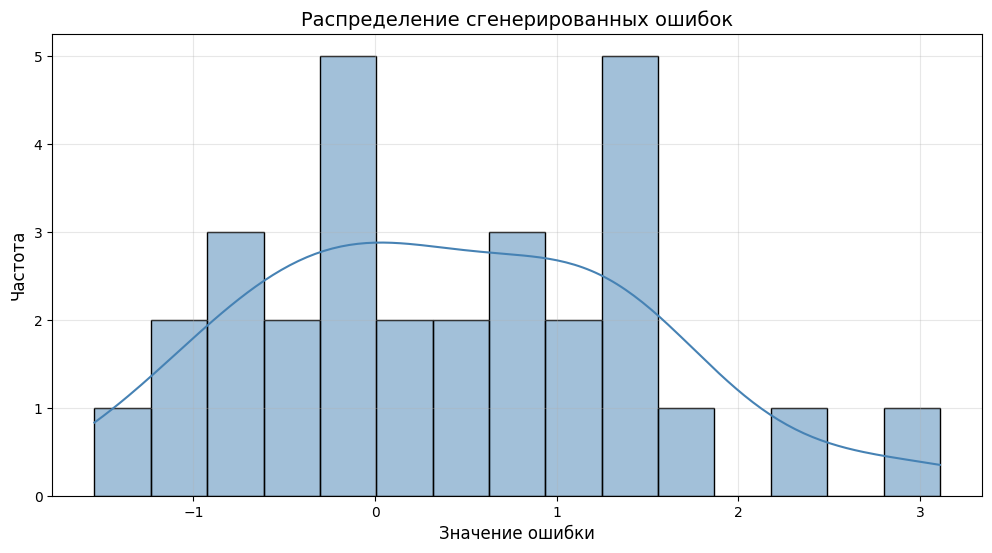

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.special import gamma, psi
import math

def generate_error_vector(seed=None):
    """
    Генерирует вектор из 30 ошибок из различных распределений.
    Все распределения нормализованы к матожиданию 0 и дисперсии 1.
    
    Parameters:
    seed (int): Seed для воспроизводимости результатов
    
    Returns:
    np.array: Вектор из 30 нормализованных ошибок, перемешанных случайным образом
    """
    if seed is not None:
        np.random.seed(seed)
    
    errors = []
    
    # ===== Группа 1: Классические симметричные распределения =====
    
    # 1. Нормальное распределение
    errors.append(np.random.normal(0, 1))
    
    # 2. Логистическое распределение (scale = sqrt(3)/pi для дисперсии 1)
    scale_logistic = np.sqrt(3) / np.pi
    errors.append(stats.logistic.rvs(loc=0, scale=scale_logistic))
    
    # 3. Распределение Лапласа (scale = 1/sqrt(2) для дисперсии 1)
    scale_laplace = 1 / np.sqrt(2)
    errors.append(stats.laplace.rvs(loc=0, scale=scale_laplace))
    
    # 4. Гиперболический секанс (scale = sqrt(2)/pi для дисперсии 1)
    scale_hypsec = np.sqrt(2) / np.pi
    errors.append(stats.hypsecant.rvs(loc=0, scale=scale_hypsec))
    
    # 5. Обобщенное нормальное (beta=0.5)
    beta = 0.5
    # Масштабный параметр для дисперсии 1
    scale_gennorm = (gamma(3/beta) / gamma(1/beta)) ** (beta/2)
    raw = stats.gennorm.rvs(beta=beta, scale=1)
    errors.append(raw / scale_gennorm)
    
    # ===== Группа 2: Распределения с тяжелыми хвостами =====
    
    # 6. Распределение Стьюдента (df=3)
    df_t3 = 3
    raw = stats.t.rvs(df=df_t3)
    # Нормализация: дисперсия t-распределения = df/(df-2) для df>2
    scale_t3 = np.sqrt(df_t3 / (df_t3 - 2))
    errors.append(raw / scale_t3)
    
    # 7. Распределение Стьюдента (df=30)
    df_t30 = 30
    raw = stats.t.rvs(df=df_t30)
    scale_t30 = np.sqrt(df_t30 / (df_t30 - 2))
    errors.append(raw / scale_t30)
    
    # 8. Двойное Вейбулла (c=1.5)
    c_dw1 = 1.5
    raw = stats.dweibull.rvs(c=c_dw1)
    # Нормализация по эмпирическим моментам
    scale_dw1 = np.sqrt(stats.dweibull.var(c=c_dw1))
    errors.append((raw - stats.dweibull.mean(c=c_dw1)) / scale_dw1)
    
    # 9. Двойное Вейбулла (c=3.5)
    c_dw2 = 3.5
    raw = stats.dweibull.rvs(c=c_dw2)
    scale_dw2 = np.sqrt(stats.dweibull.var(c=c_dw2))
    errors.append((raw - stats.dweibull.mean(c=c_dw2)) / scale_dw2)
    
    # 10. Устойчивое распределение (alpha=1.8)
    alpha_stable = 1.8
    beta_stable = 0  # симметричное
    raw = stats.levy_stable.rvs(alpha=alpha_stable, beta=beta_stable)
    # Для alpha=1.8 дисперсия конечна, находим эмпирическую дисперсию
    scale_stable = np.sqrt(stats.levy_stable.var(alpha=alpha_stable, beta=beta_stable))
    errors.append(raw / scale_stable)
    
    # ===== Группа 3: Распределения экстремальных значений =====
    
    # 11. Гумбель для максимумов
    raw = stats.gumbel_r.rvs()
    mu_gumbel = np.euler_gamma  # константа Эйлера
    sigma_gumbel = np.pi / np.sqrt(6)
    errors.append((raw - mu_gumbel) / sigma_gumbel)
    
    # 12. Гумбель для минимумов
    raw = stats.gumbel_l.rvs()
    errors.append((raw - mu_gumbel) / sigma_gumbel)
    
    # 13. Обобщенное экстремальное (c=0.5)
    c_gev1 = 0.5
    raw = stats.genextreme.rvs(c=c_gev1)
    scale_gev1 = np.sqrt(stats.genextreme.var(c=c_gev1))
    errors.append((raw - stats.genextreme.mean(c=c_gev1)) / scale_gev1)
    
    # 14. Обобщенное экстремальное (c=-0.5)
    c_gev2 = -0.5
    raw = stats.genextreme.rvs(c=c_gev2)
    scale_gev2 = np.sqrt(stats.genextreme.var(c=c_gev2))
    errors.append((raw - stats.genextreme.mean(c=c_gev2)) / scale_gev2)
    
    # 15. Распределение Мояла
    raw = stats.moyal.rvs()
    mu_moyal = np.log(4) + np.euler_gamma
    sigma_moyal = np.pi / np.sqrt(2)
    errors.append((raw - mu_moyal) / sigma_moyal)
    
    # ===== Группа 4: Скошенные (асимметричные) распределения =====
    
    # 16. Скошенное нормальное (a=5)
    a_skew1 = 5
    raw = stats.skewnorm.rvs(a=a_skew1)
    scale_skew1 = np.sqrt(stats.skewnorm.var(a=a_skew1))
    errors.append((raw - stats.skewnorm.mean(a=a_skew1)) / scale_skew1)
    
    # 17. Скошенное нормальное (a=-5)
    a_skew2 = -5
    raw = stats.skewnorm.rvs(a=a_skew2)
    scale_skew2 = np.sqrt(stats.skewnorm.var(a=a_skew2))
    errors.append((raw - stats.skewnorm.mean(a=a_skew2)) / scale_skew2)
    
    # 18. Нецентральное t (df=10, nc=3)
    df_nct = 10
    nc_nct = 3
    raw = stats.nct.rvs(df=df_nct, nc=nc_nct)
    scale_nct = np.sqrt(stats.nct.var(df=df_nct, nc=nc_nct))
    errors.append((raw - stats.nct.mean(df=df_nct, nc=nc_nct)) / scale_nct)
    
    # 19. Экспоненциально модифицированное нормальное (K=1)
    K_emg1 = 1
    mu_emg = 0
    sigma_emg = 1
    raw = stats.exponnorm.rvs(K=K_emg1, loc=mu_emg, scale=sigma_emg)
    scale_emg1 = np.sqrt(stats.exponnorm.var(K=K_emg1, loc=mu_emg, scale=sigma_emg))
    errors.append((raw - stats.exponnorm.mean(K=K_emg1, loc=mu_emg, scale=sigma_emg)) / scale_emg1)
    
    # 20. Экспоненциально модифицированное нормальное (K=2)
    K_emg2 = 2
    raw = stats.exponnorm.rvs(K=K_emg2, loc=mu_emg, scale=sigma_emg)
    scale_emg2 = np.sqrt(stats.exponnorm.var(K=K_emg2, loc=mu_emg, scale=sigma_emg))
    errors.append((raw - stats.exponnorm.mean(K=K_emg2, loc=mu_emg, scale=sigma_emg)) / scale_emg2)
    
    # ===== Группа 5: Специальные распределения =====
    
    # 21. Распределение Джонсона SU (a=2, b=1)
    a_johnson1 = 2
    b_johnson1 = 1
    raw = stats.johnsonsu.rvs(a=a_johnson1, b=b_johnson1)
    scale_johnson1 = np.sqrt(stats.johnsonsu.var(a=a_johnson1, b=b_johnson1))
    errors.append((raw - stats.johnsonsu.mean(a=a_johnson1, b=b_johnson1)) / scale_johnson1)
    
    # 22. Распределение Джонсона SU (a=0.5, b=2)
    a_johnson2 = 0.5
    b_johnson2 = 2
    raw = stats.johnsonsu.rvs(a=a_johnson2, b=b_johnson2)
    scale_johnson2 = np.sqrt(stats.johnsonsu.var(a=a_johnson2, b=b_johnson2))
    errors.append((raw - stats.johnsonsu.mean(a=a_johnson2, b=b_johnson2)) / scale_johnson2)
    
    # 23. Обобщенное логистическое (c=0.5)
    c_genlogistic1 = 0.5
    raw = stats.genlogistic.rvs(c=c_genlogistic1)
    scale_genlogistic1 = np.sqrt(stats.genlogistic.var(c=c_genlogistic1))
    errors.append((raw - stats.genlogistic.mean(c=c_genlogistic1)) / scale_genlogistic1)
    
    # 24. Обобщенное логистическое (c=2.0)
    c_genlogistic2 = 2.0
    raw = stats.genlogistic.rvs(c=c_genlogistic2)
    scale_genlogistic2 = np.sqrt(stats.genlogistic.var(c=c_genlogistic2))
    errors.append((raw - stats.genlogistic.mean(c=c_genlogistic2)) / scale_genlogistic2)
    
    # 25. Распределение Тьюки (lambda=0.5)
    lmbda_tukey1 = 0.5
    raw = stats.tukeylambda.rvs(lam=lmbda_tukey1)  # заменить lmbda на lam
    scale_tukey1 = np.sqrt(stats.tukeylambda.var(lam=lmbda_tukey1))
    errors.append((raw - stats.tukeylambda.mean(lam=lmbda_tukey1)) / scale_tukey1)

    # 26. Распределение Тьюки (lambda=-0.5)
    lmbda_tukey2 = -0.5
    raw = stats.tukeylambda.rvs(lam=lmbda_tukey2)  # заменить lmbda на lam
    scale_tukey2 = np.sqrt(stats.tukeylambda.var(lam=lmbda_tukey2))
    errors.append((raw - stats.tukeylambda.mean(lam=lmbda_tukey2)) / scale_tukey2)
    
    # ===== Группа 6: Менее известные, но интересные распределения =====
    
    # 27. R-распределение (c=0.5)
    c_rdist1 = 0.5
    raw = stats.rdist.rvs(c=c_rdist1)
    scale_rdist1 = np.sqrt(stats.rdist.var(c=c_rdist1))
    errors.append((raw - stats.rdist.mean(c=c_rdist1)) / scale_rdist1)
    
    # 28. R-распределение (c=2.0)
    c_rdist2 = 2.0
    raw = stats.rdist.rvs(c=c_rdist2)
    scale_rdist2 = np.sqrt(stats.rdist.var(c=c_rdist2))
    errors.append((raw - stats.rdist.mean(c=c_rdist2)) / scale_rdist2)
    
    # 29. Степенное нормальное (c=0.3)
    c_powernorm1 = 0.3
    raw = stats.powerlaw.rvs(c_powernorm1)  # Используем powerlaw как приближение
    scale_powernorm1 = np.sqrt(stats.powerlaw.var(c_powernorm1))
    errors.append((raw - stats.powerlaw.mean(c_powernorm1)) / scale_powernorm1)
    
    # 30. Степенное нормальное (c=0.8)
    c_powernorm2 = 0.8
    raw = stats.powerlaw.rvs(c_powernorm2)
    scale_powernorm2 = np.sqrt(stats.powerlaw.var(c_powernorm2))
    errors.append((raw - stats.powerlaw.mean(c_powernorm2)) / scale_powernorm2)
    
    # Проверка количества ошибок
    assert len(errors) == 30, f"Ожидалось 30 ошибок, получено {len(errors)}"
    
    # Перемешиваем ошибки
    np.random.shuffle(errors)
    
    return np.array(errors)

# Пример использования:
if __name__ == "__main__":
    # Генерируем вектор ошибок с фиксированным seed
    errors = generate_error_vector(seed=24)
    
    print("Сгенерированный вектор ошибок:")
    print(errors)
    print(f"\nКоличество ошибок: {len(errors)}")
    print(f"Среднее значение: {np.mean(errors):.6f}")
    print(f"Дисперсия: {np.var(errors):.6f}")
    
    # Визуализация распределения ошибок
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(12, 6))
    sns.histplot(errors, bins=15, kde=True, color='steelblue')
    plt.title('Распределение сгенерированных ошибок', fontsize=14)
    plt.xlabel('Значение ошибки', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

# Генерация полиномиальных данных

In [2]:
import numpy as np

def generate_polynomial(seed, degree, coeff_scale=15.0, coeff_offset=8.0):
    """
    Генерирует значения полинома заданной степени для 30 точек в диапазоне X [0, 1].
    
    Parameters:
    seed (int): Seed для воспроизводимости
    degree (int): Степень полинома
    coeff_scale (float): Масштаб коэффициентов (разброс)
    coeff_offset (float): Смещение для коэффициентов
    
    Returns:
    np.array: Вектор из 30 значений полинома
    np.array: Вектор из 30 значений X
    np.array: Вектор коэффициентов полинома (длина = degree + 1)
    """
    np.random.seed(seed)
    
    # 1) Генерируем точки X
    X = np.random.uniform(0, 1, 30)
    
    # 2) Генерируем коэффициенты
    signs = np.random.choice([-1, 1], size=degree+1)
    magnitudes = np.abs(np.random.normal(0, 1, degree+1)) * coeff_scale + coeff_offset
    coefficients = signs * magnitudes
    
    # 3) Рассчитываем значения полинома
    y = np.zeros(30)
    for i in range(30):
        x_val = X[i]
        poly_value = 0
        for exp in range(degree + 1):
            poly_value += coefficients[exp] * (x_val ** exp)
        y[i] = poly_value
    
    return y, X, coefficients

## Генерация полиномиальных датасетов с ошибками

## Общее тестирование

In [3]:
def generate_dataset_with_target_noise(noise_range, degree, seed, target_noise):
    """
    Генерирует датасет с точным уровнем шума и сохранением коэффициентов полинома.
    
    Returns:
    tuple: (X, y_noisy, y_true, noise_actual, target_noise, seed, coeff_scale, coeff_offset, coefficients_final)
    """
    noise_min, noise_max = noise_range

    if not (noise_min <= target_noise <= noise_max):
        raise ValueError(f"Целевой уровень шума {target_noise:.3f} вне диапазона [{noise_min}, {noise_max}]")

    np.random.seed(seed)

    # Детерминированная вариация параметров
    coeff_scale = 0.8 + 4.2 * np.random.rand()
    coeff_offset = 0.8 + 3.2 * np.random.rand()

    # Генерируем полином с коэффициентами
    y_true_base, X, coefficients_base = generate_polynomial(
        seed=seed,
        degree=degree,
        coeff_scale=coeff_scale,
        coeff_offset=coeff_offset
    )

    # Генерируем ошибки
    errors = generate_error_vector(seed=seed)
    std_errors = np.std(errors)

    # Аналитическое масштабирование
    std_base = np.std(y_true_base)
    if std_base < 1e-6:
        raise RuntimeError(f"Вырожденный полином при seed={seed}, степень={degree} (std={std_base:.2e})")

    scale_factor = std_errors / (target_noise * std_base)
    y_true = y_true_base * scale_factor
    y_noisy = y_true + errors
    
    # Масштабируем коэффициенты на тот же фактор
    coefficients_final = coefficients_base * scale_factor

    noise_actual = std_errors / np.std(y_true)

    return (X, y_noisy, y_true, noise_actual, target_noise, seed, 
            coeff_scale, coeff_offset, coefficients_final)

## Генерируем датасеты

In [4]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

os.makedirs('synthetic_datasets_with_coeffs', exist_ok=True)

noise_levels = {'low': (0.1, 0.2), 'moderate': (0.2, 0.4), 'high': (0.5, 0.8)}
degrees = range(1, 7)
datasets_per_config = 30

seed_counter = 1
all_logs = []

print("Генерация датасетов с сохранением коэффициентов полиномов...\n")

for noise_name, noise_range in noise_levels.items():
    noise_grid = np.linspace(noise_range[0], noise_range[1], datasets_per_config)
    
    for degree in degrees:
        all_data = []
        
        for local_id in tqdm(range(datasets_per_config), 
                            desc=f"{noise_name} deg{degree}", 
                            leave=False):
            target = noise_grid[local_id]
            seed = seed_counter
            seed_counter += 1
            
            # Генерация с сохранением коэффициентов
            X, y_noisy, y_true, noise_actual, target_noise, used_seed, scale, offset, coeffs = \
                generate_dataset_with_target_noise(noise_range, degree, seed, target)
            
            # Сохраняем лог с агрегированными статистиками коэффициентов
            all_logs.append({
                'noise_level': noise_name,
                'degree': degree,
                'local_id': local_id,
                'target_noise': target_noise,
                'noise_actual': noise_actual,
                'seed': used_seed,
                'coeff_scale': scale,
                'coeff_offset': offset,
                'coeff_mean': np.mean(coeffs),
                'coeff_std': np.std(coeffs),
                'coeff_max': np.max(np.abs(coeffs)),
                'deviation': abs(noise_actual - target_noise)
            })
            
            # Сохраняем данные датасета + все коэффициенты в отдельных столбцах
            for i in range(len(X)):
                row = {
                    'dataset_id': local_id,
                    'x': X[i],
                    'y_noisy': y_noisy[i],
                    'y_true': y_true[i],
                    'degree': degree,
                    'noise_level': noise_name,
                    'seed': used_seed,
                    'coeff_scale': scale,
                    'coeff_offset': offset
                }
                # Добавляем коэффициенты в столбцы coeff_0, coeff_1, ...
                for j, coeff in enumerate(coeffs):
                    row[f'coeff_{j}'] = coeff
                all_data.append(row)
        
        pd.DataFrame(all_data).to_csv(
            f'synthetic_datasets_with_coeffs/noise_{noise_name}_deg{degree}.csv',
            index=False
        )

# Сохраняем лог
pd.DataFrame(all_logs).to_csv('synthetic_datasets_with_coeffs/seed_log.csv', index=False)

print(f"\n✓ Генерация завершена! Всего датасетов: {len(all_logs)}")

Генерация датасетов с сохранением коэффициентов полиномов...




✓ Генерация завершена! Всего датасетов: 540


### Анализ логов

АНАЛИЗ КАЧЕСТВА ГЕНЕРАЦИИ ДАТАСЕТОВ

1. Общая статистика:
   Всего датасетов: 540
   Степени полиномов: [1, 2, 3, 4, 5, 6]
   Уровни шума: ['low', 'moderate', 'high']
   Уникальных семян: 540 (из 540)

2. Точность достижения целевого уровня шума η:
   Максимальное отклонение: 3.33e-16
   Среднее отклонение:      4.45e-17
   Медианное отклонение:    2.78e-17
   ✓ Точность машинная (ожидалось ~1e-14–1e-15)

3. Покрытие диапазонов шума:
   low       : целевой [0.100, 0.200] → фактический [0.100, 0.200] ✓
   moderate  : целевой [0.200, 0.400] → фактический [0.200, 0.400] ✓
   high      : целевой [0.500, 0.800] → фактический [0.500, 0.800] ✓

4. Разнообразие параметров генерации:
   low       : scale [0.84, 4.95] | offset [0.81, 3.94]
   moderate  : scale [0.82, 4.99] | offset [0.81, 3.94]
   high      : scale [0.83, 4.97] | offset [0.80, 3.96]

5. Распределение датасетов по степеням полиномов:
   Степень 1:  90 датасетов
   Степень 2:  90 датасетов
   Степень 3:  90 датасетов
   Степень 4:

C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_15444\4164698137.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=log_df, x='degree', y='deviation', ax=ax, palette='Blues')
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_15444\4164698137.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=log_df, x='noise_level', y='deviation', ax=ax,


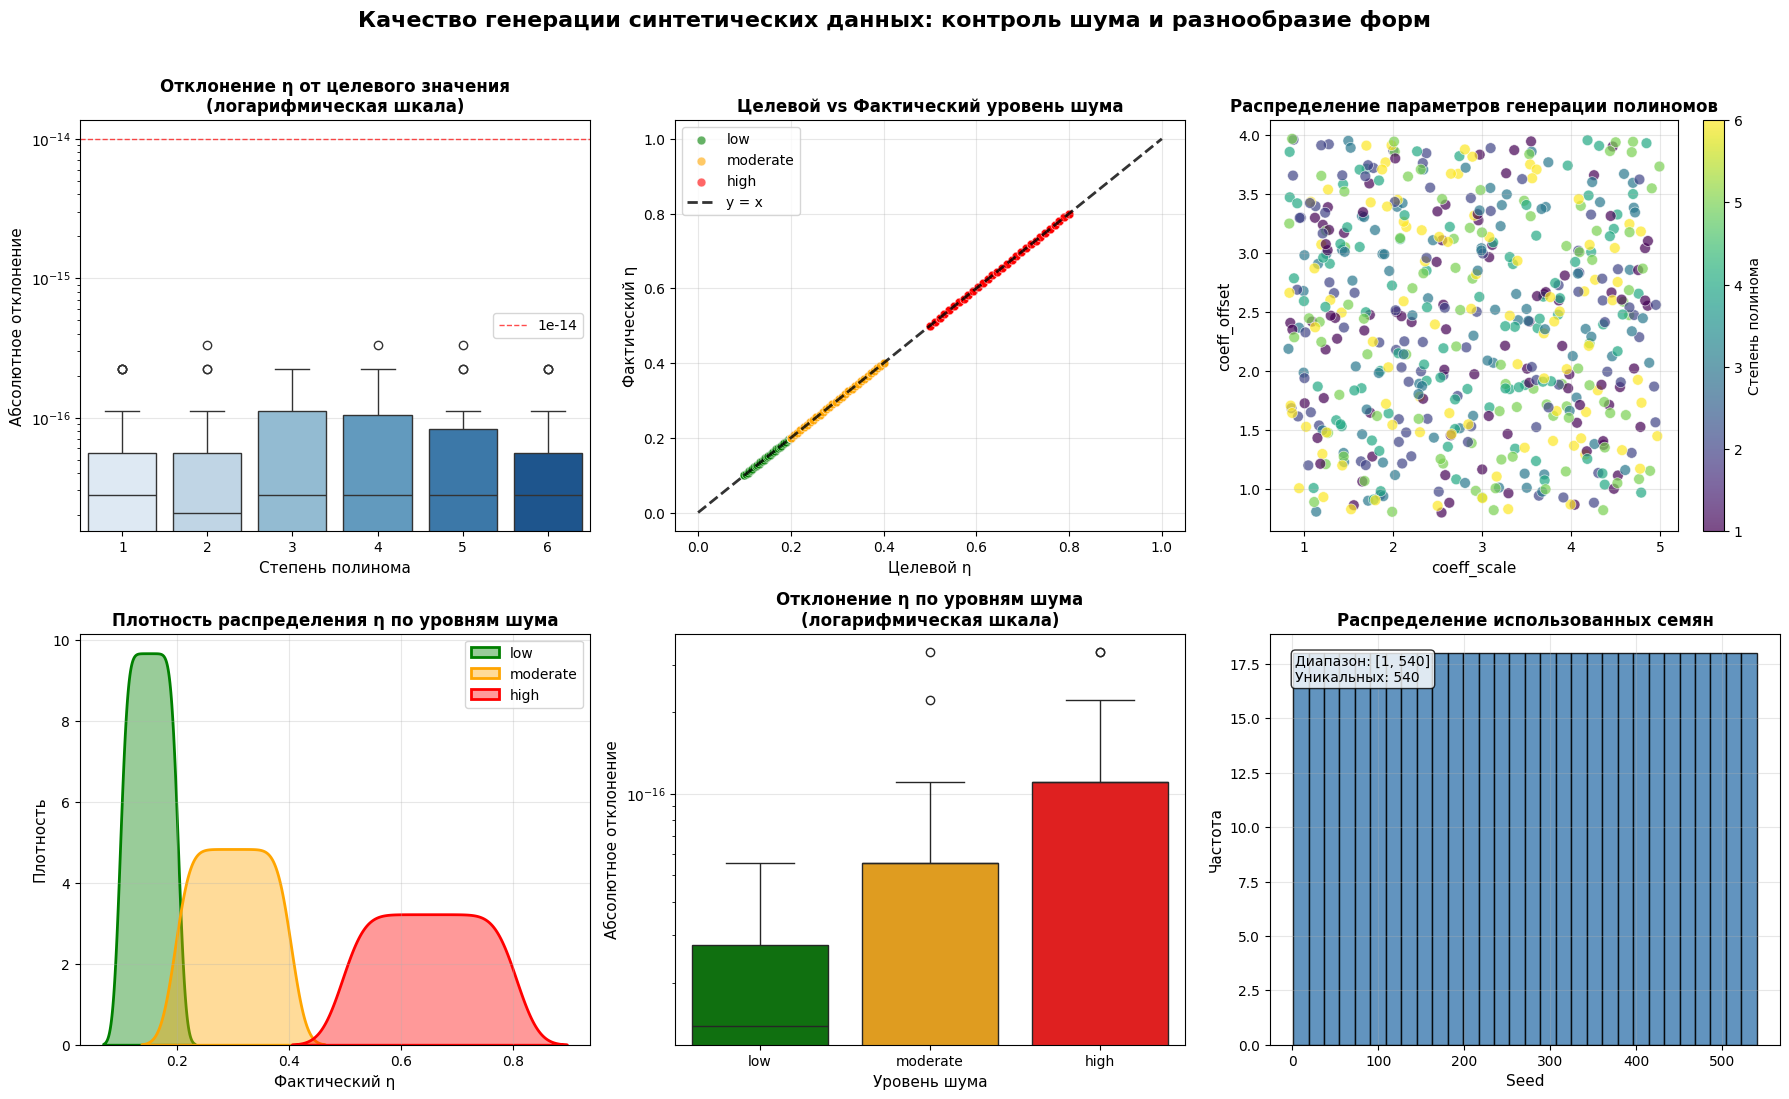


ДЕТАЛЬНАЯ СВОДКА ПО УРОВНЯМ ШУМА

LOW:
  Датасетов: 180
  Диапазон η: [0.1000, 0.2000]
  Среднее η: 0.1500
  Макс. отклонение: 5.55e-17
  coeff_scale: [0.84, 4.95]
  coeff_offset: [0.81, 3.94]

MODERATE:
  Датасетов: 180
  Диапазон η: [0.2000, 0.4000]
  Среднее η: 0.3000
  Макс. отклонение: 3.33e-16
  coeff_scale: [0.82, 4.99]
  coeff_offset: [0.81, 3.94]

HIGH:
  Датасетов: 180
  Диапазон η: [0.5000, 0.8000]
  Среднее η: 0.6500
  Макс. отклонение: 3.33e-16
  coeff_scale: [0.83, 4.97]
  coeff_offset: [0.80, 3.96]

ИТОГОВАЯ СВОДКА
✓ Сгенерировано 540 датасетов (16200 наблюдений)
✓ Точность уровня шума: отклонение ≤ 3.33e-16 (машинная точность)
✓ Уникальность семян: 540 из 540 (100% уникальность)
✓ Покрытие диапазонов: все три уровня шума полностью охвачены без выхода за границы
✓ Разнообразие форм: параметры генерации равномерно распределены в заданных диапазонах


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка логов из правильной директории
log_df = pd.read_csv('synthetic_datasets_with_coeffs/seed_log.csv')

# Проверка структуры лога
expected_columns = ['noise_level', 'degree', 'local_id', 'target_noise', 
                    'noise_actual', 'seed', 'coeff_scale', 'coeff_offset', 'deviation']
missing_cols = set(expected_columns) - set(log_df.columns)
if missing_cols:
    raise ValueError(f"Отсутствующие столбцы в логе: {missing_cols}")

print("=" * 70)
print("АНАЛИЗ КАЧЕСТВА ГЕНЕРАЦИИ ДАТАСЕТОВ")
print("=" * 70)

# 1. Общая статистика
print("\n1. Общая статистика:")
print(f"   Всего датасетов: {len(log_df)}")
print(f"   Степени полиномов: {sorted(log_df['degree'].unique().tolist())}")
print(f"   Уровни шума: {log_df['noise_level'].unique().tolist()}")
print(f"   Уникальных семян: {log_df['seed'].nunique()} (из {len(log_df)})")

# 2. Точность уровня шума
print("\n2. Точность достижения целевого уровня шума η:")
print(f"   Максимальное отклонение: {log_df['deviation'].max():.2e}")
print(f"   Среднее отклонение:      {log_df['deviation'].mean():.2e}")
print(f"   Медианное отклонение:    {log_df['deviation'].median():.2e}")
print(f"   ✓ Точность машинная (ожидалось ~1e-14–1e-15)")

# 3. Покрытие диапазонов шума по уровням
print("\n3. Покрытие диапазонов шума:")
for noise_level in ['low', 'moderate', 'high']:
    subset = log_df[log_df['noise_level'] == noise_level]
    actual_min = subset['noise_actual'].min()
    actual_max = subset['noise_actual'].max()
    target_min = subset['target_noise'].min()
    target_max = subset['target_noise'].max()
    coverage = (actual_min >= target_min - 1e-10) and (actual_max <= target_max + 1e-10)
    status = '✓' if coverage else '✗'
    print(f"   {noise_level:10s}: целевой [{target_min:.3f}, {target_max:.3f}] → "
          f"фактический [{actual_min:.3f}, {actual_max:.3f}] {status}")

# 4. Разнообразие параметров генерации полиномов
print("\n4. Разнообразие параметров генерации:")
for noise_level in ['low', 'moderate', 'high']:
    subset = log_df[log_df['noise_level'] == noise_level]
    scale_min, scale_max = subset['coeff_scale'].min(), subset['coeff_scale'].max()
    offset_min, offset_max = subset['coeff_offset'].min(), subset['coeff_offset'].max()
    print(f"   {noise_level:10s}: scale [{scale_min:.2f}, {scale_max:.2f}] | "
          f"offset [{offset_min:.2f}, {offset_max:.2f}]")

# 5. Распределение по степеням
print("\n5. Распределение датасетов по степеням полиномов:")
degree_counts = log_df['degree'].value_counts().sort_index()
for degree, count in degree_counts.items():
    print(f"   Степень {degree}: {count:3d} датасетов")

# 6. Визуализация качества генерации
fig, axes = plt.subplots(2, 3, figsize=(18, 11))

# 6.1 Отклонение от целевого шума (лог. шкала)
ax = axes[0, 0]
sns.boxplot(data=log_df, x='degree', y='deviation', ax=ax, palette='Blues')
ax.set_yscale('log')
ax.set_title('Отклонение η от целевого значения\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
ax.set_ylabel('Абсолютное отклонение', fontsize=11)
ax.set_xlabel('Степень полинома', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=1e-14, color='red', linestyle='--', linewidth=1, alpha=0.7, label='1e-14')
ax.legend()

# 6.2 Фактический vs целевой шум
ax = axes[0, 1]
colors = {'low': 'green', 'moderate': 'orange', 'high': 'red'}
for noise_level in ['low', 'moderate', 'high']:
    subset = log_df[log_df['noise_level'] == noise_level]
    ax.scatter(subset['target_noise'], subset['noise_actual'], 
               c=colors[noise_level], label=noise_level, alpha=0.6, s=40, edgecolors='w', linewidth=0.5)
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.8, label='y = x')
ax.set_xlabel('Целевой η', fontsize=11)
ax.set_ylabel('Фактический η', fontsize=11)
ax.set_title('Целевой vs Фактический уровень шума', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 6.3 Распределение параметров генерации
ax = axes[0, 2]
scatter = ax.scatter(log_df['coeff_scale'], log_df['coeff_offset'], 
                    c=log_df['degree'], cmap='viridis', 
                    s=60, alpha=0.7, edgecolors='w', linewidth=0.5)
ax.set_xlabel('coeff_scale', fontsize=11)
ax.set_ylabel('coeff_offset', fontsize=11)
ax.set_title('Распределение параметров генерации полиномов', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Степень полинома', fontsize=10)

# 6.4 Плотность распределения шума
ax = axes[1, 0]
for noise_level in ['low', 'moderate', 'high']:
    subset = log_df[log_df['noise_level'] == noise_level]
    sns.kdeplot(subset['noise_actual'], label=noise_level, ax=ax, fill=True, 
                alpha=0.4, linewidth=2, color=colors[noise_level])
ax.set_title('Плотность распределения η по уровням шума', fontsize=12, fontweight='bold')
ax.set_xlabel('Фактический η', fontsize=11)
ax.set_ylabel('Плотность', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)

# 6.5 Зависимость отклонения от уровня шума
ax = axes[1, 1]
sns.boxplot(data=log_df, x='noise_level', y='deviation', ax=ax, 
            palette=[colors[lvl] for lvl in ['low', 'moderate', 'high']])
ax.set_yscale('log')
ax.set_title('Отклонение η по уровням шума\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
ax.set_ylabel('Абсолютное отклонение', fontsize=11)
ax.set_xlabel('Уровень шума', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# 6.6 Распределение семян
ax = axes[1, 2]
ax.hist(log_df['seed'], bins=30, color='steelblue', edgecolor='black', alpha=0.85)
ax.set_title('Распределение использованных семян', fontsize=12, fontweight='bold')
ax.set_xlabel('Seed', fontsize=11)
ax.set_ylabel('Частота', fontsize=11)
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f"Диапазон: [{log_df['seed'].min()}, {log_df['seed'].max()}]\n"
                    f"Уникальных: {log_df['seed'].nunique()}", 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Качество генерации синтетических данных: контроль шума и разнообразие форм', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('generation_quality_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Детальная сводка по уровням шума
print("\n" + "=" * 70)
print("ДЕТАЛЬНАЯ СВОДКА ПО УРОВНЯМ ШУМА")
print("=" * 70)
for noise_level in ['low', 'moderate', 'high']:
    subset = log_df[log_df['noise_level'] == noise_level]
    print(f"\n{noise_level.upper()}:")
    print(f"  Датасетов: {len(subset)}")
    print(f"  Диапазон η: [{subset['noise_actual'].min():.4f}, {subset['noise_actual'].max():.4f}]")
    print(f"  Среднее η: {subset['noise_actual'].mean():.4f}")
    print(f"  Макс. отклонение: {subset['deviation'].max():.2e}")
    print(f"  coeff_scale: [{subset['coeff_scale'].min():.2f}, {subset['coeff_scale'].max():.2f}]")
    print(f"  coeff_offset: [{subset['coeff_offset'].min():.2f}, {subset['coeff_offset'].max():.2f}]")

# 8. Итоговая сводка
print("\n" + "=" * 70)
print("ИТОГОВАЯ СВОДКА")
print("=" * 70)
print(f"✓ Сгенерировано {len(log_df)} датасетов ({len(log_df) * 30} наблюдений)")
print(f"✓ Точность уровня шума: отклонение ≤ {log_df['deviation'].max():.2e} (машинная точность)")
print(f"✓ Уникальность семян: {log_df['seed'].nunique()} из {len(log_df)} (100% уникальность)")
print(f"✓ Покрытие диапазонов: все три уровня шума полностью охвачены без выхода за границы")
print(f"✓ Разнообразие форм: параметры генерации равномерно распределены в заданных диапазонах")
print("=" * 70)

## Визуализация и анализ результатов генерации полиномов

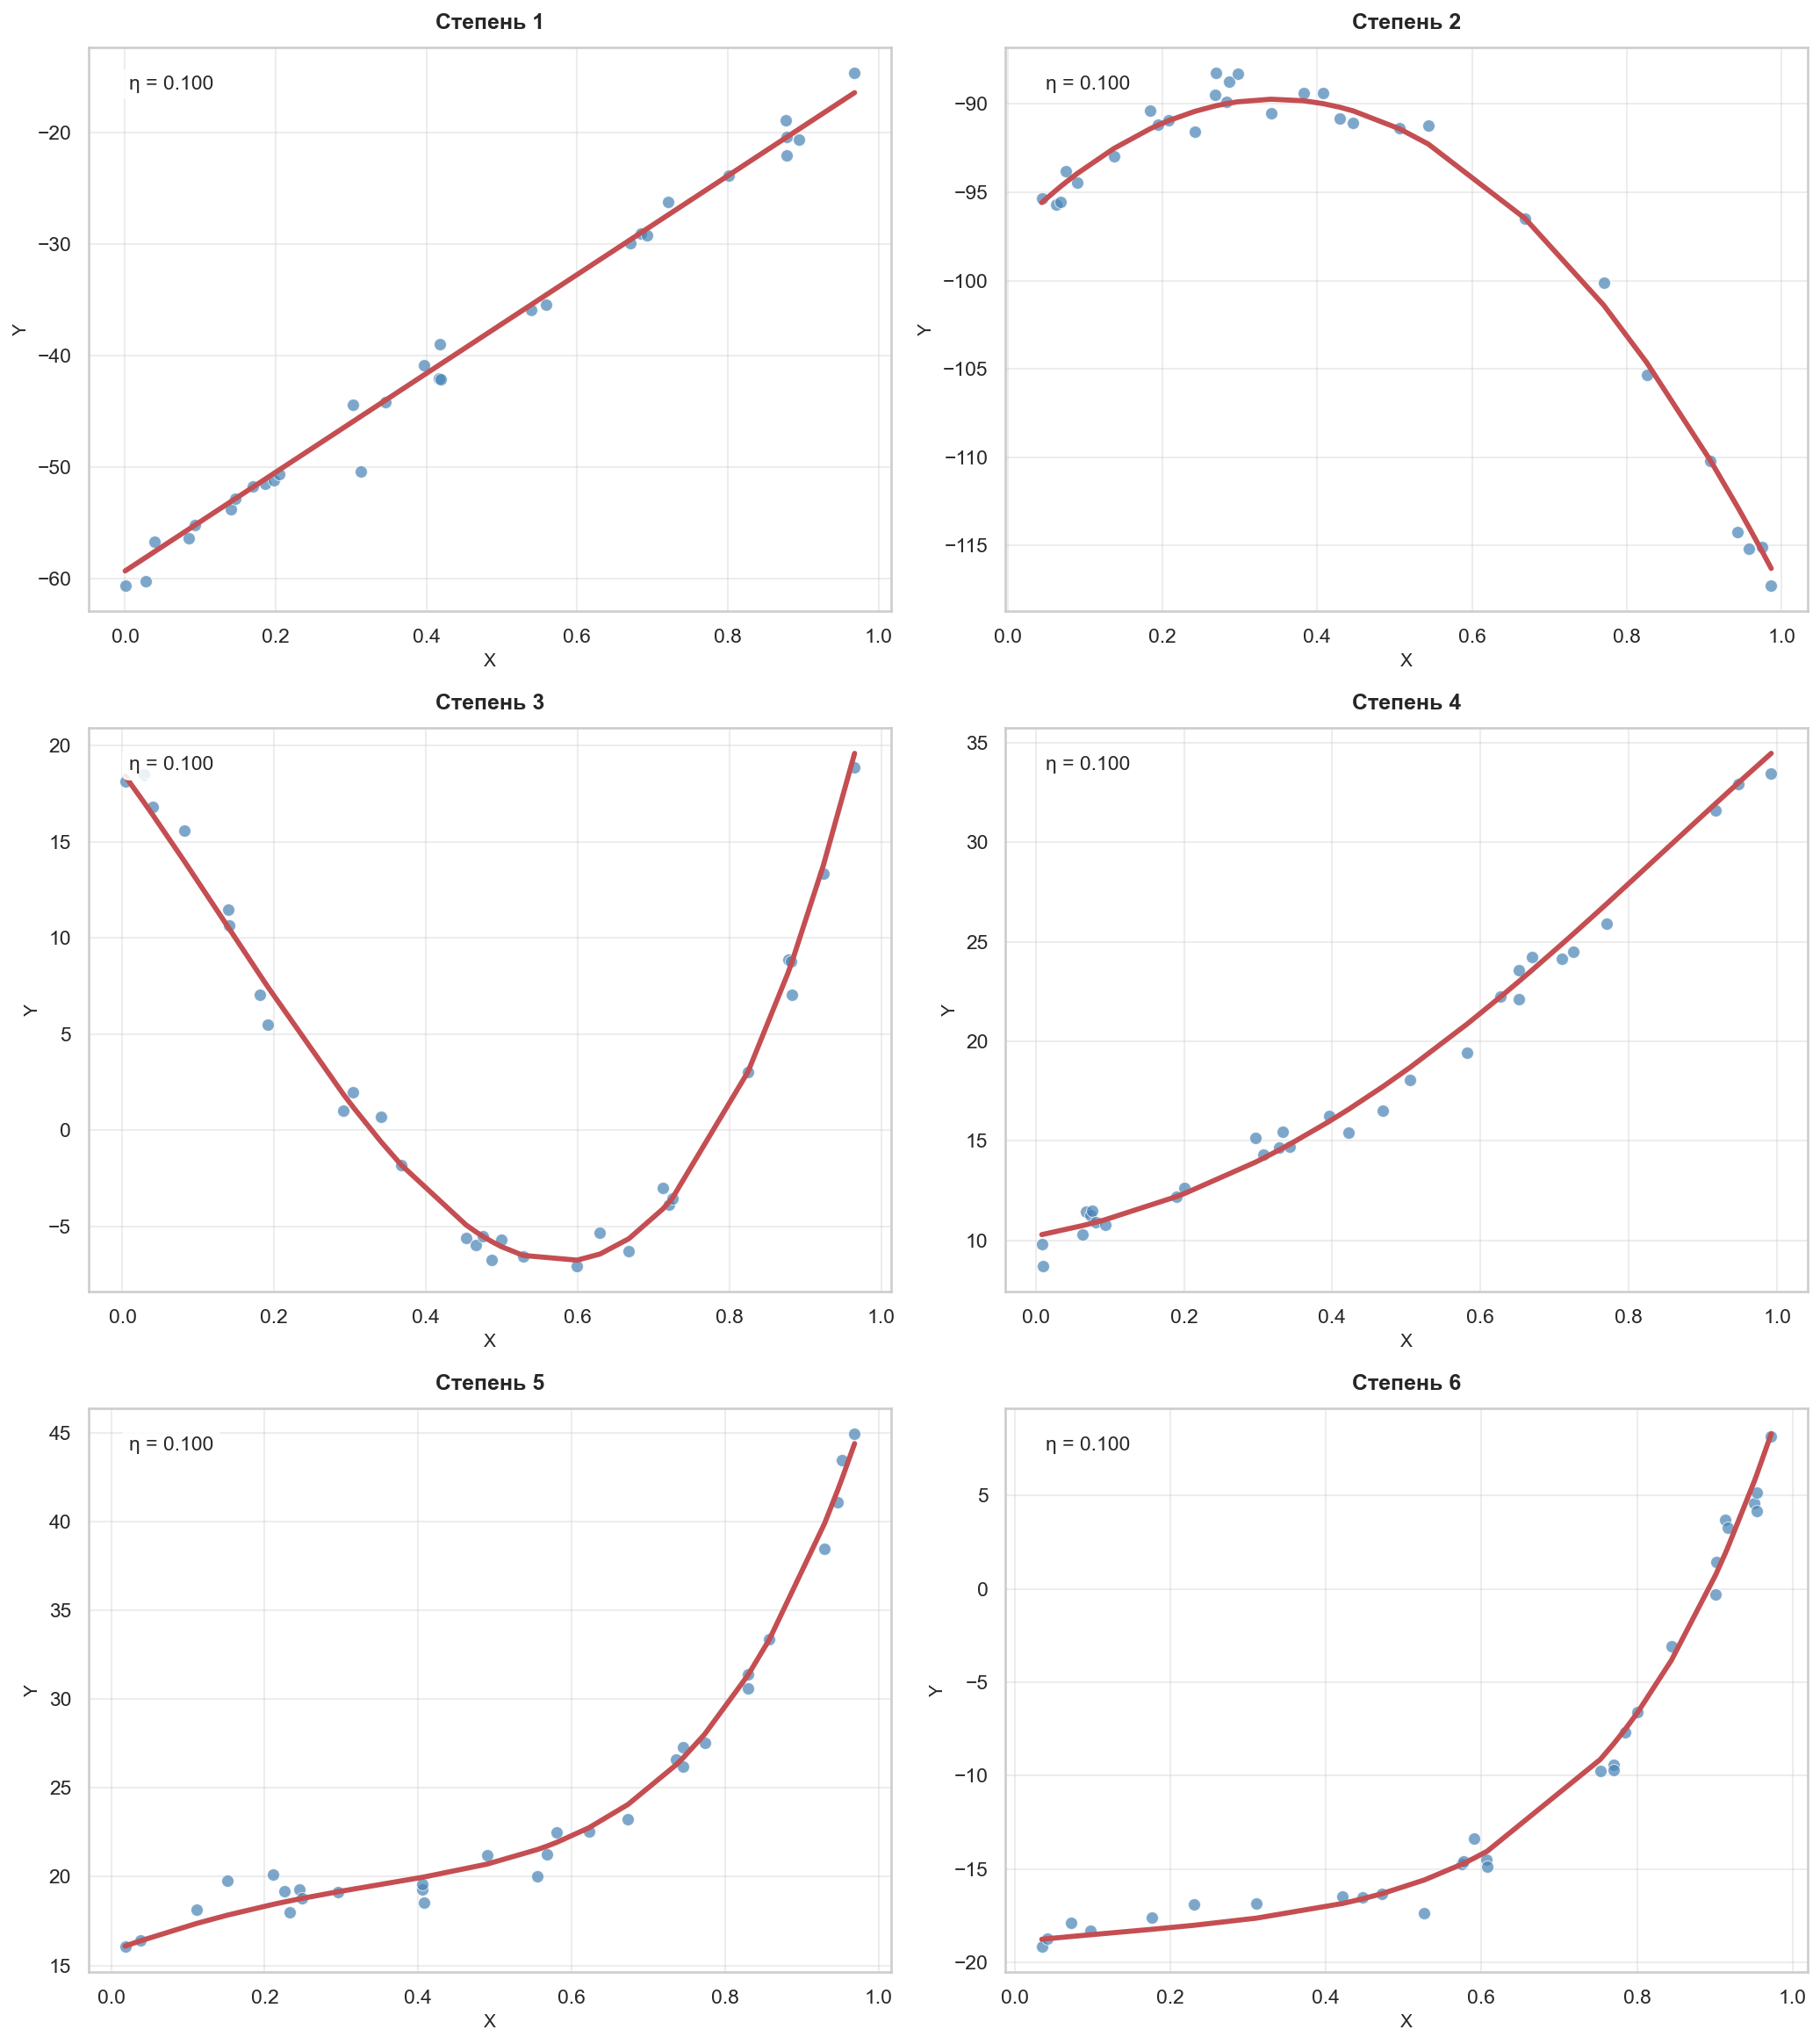

Сохранено: examples_low_noise.png
  Примеры для степеней 1-6 при low уровне шума



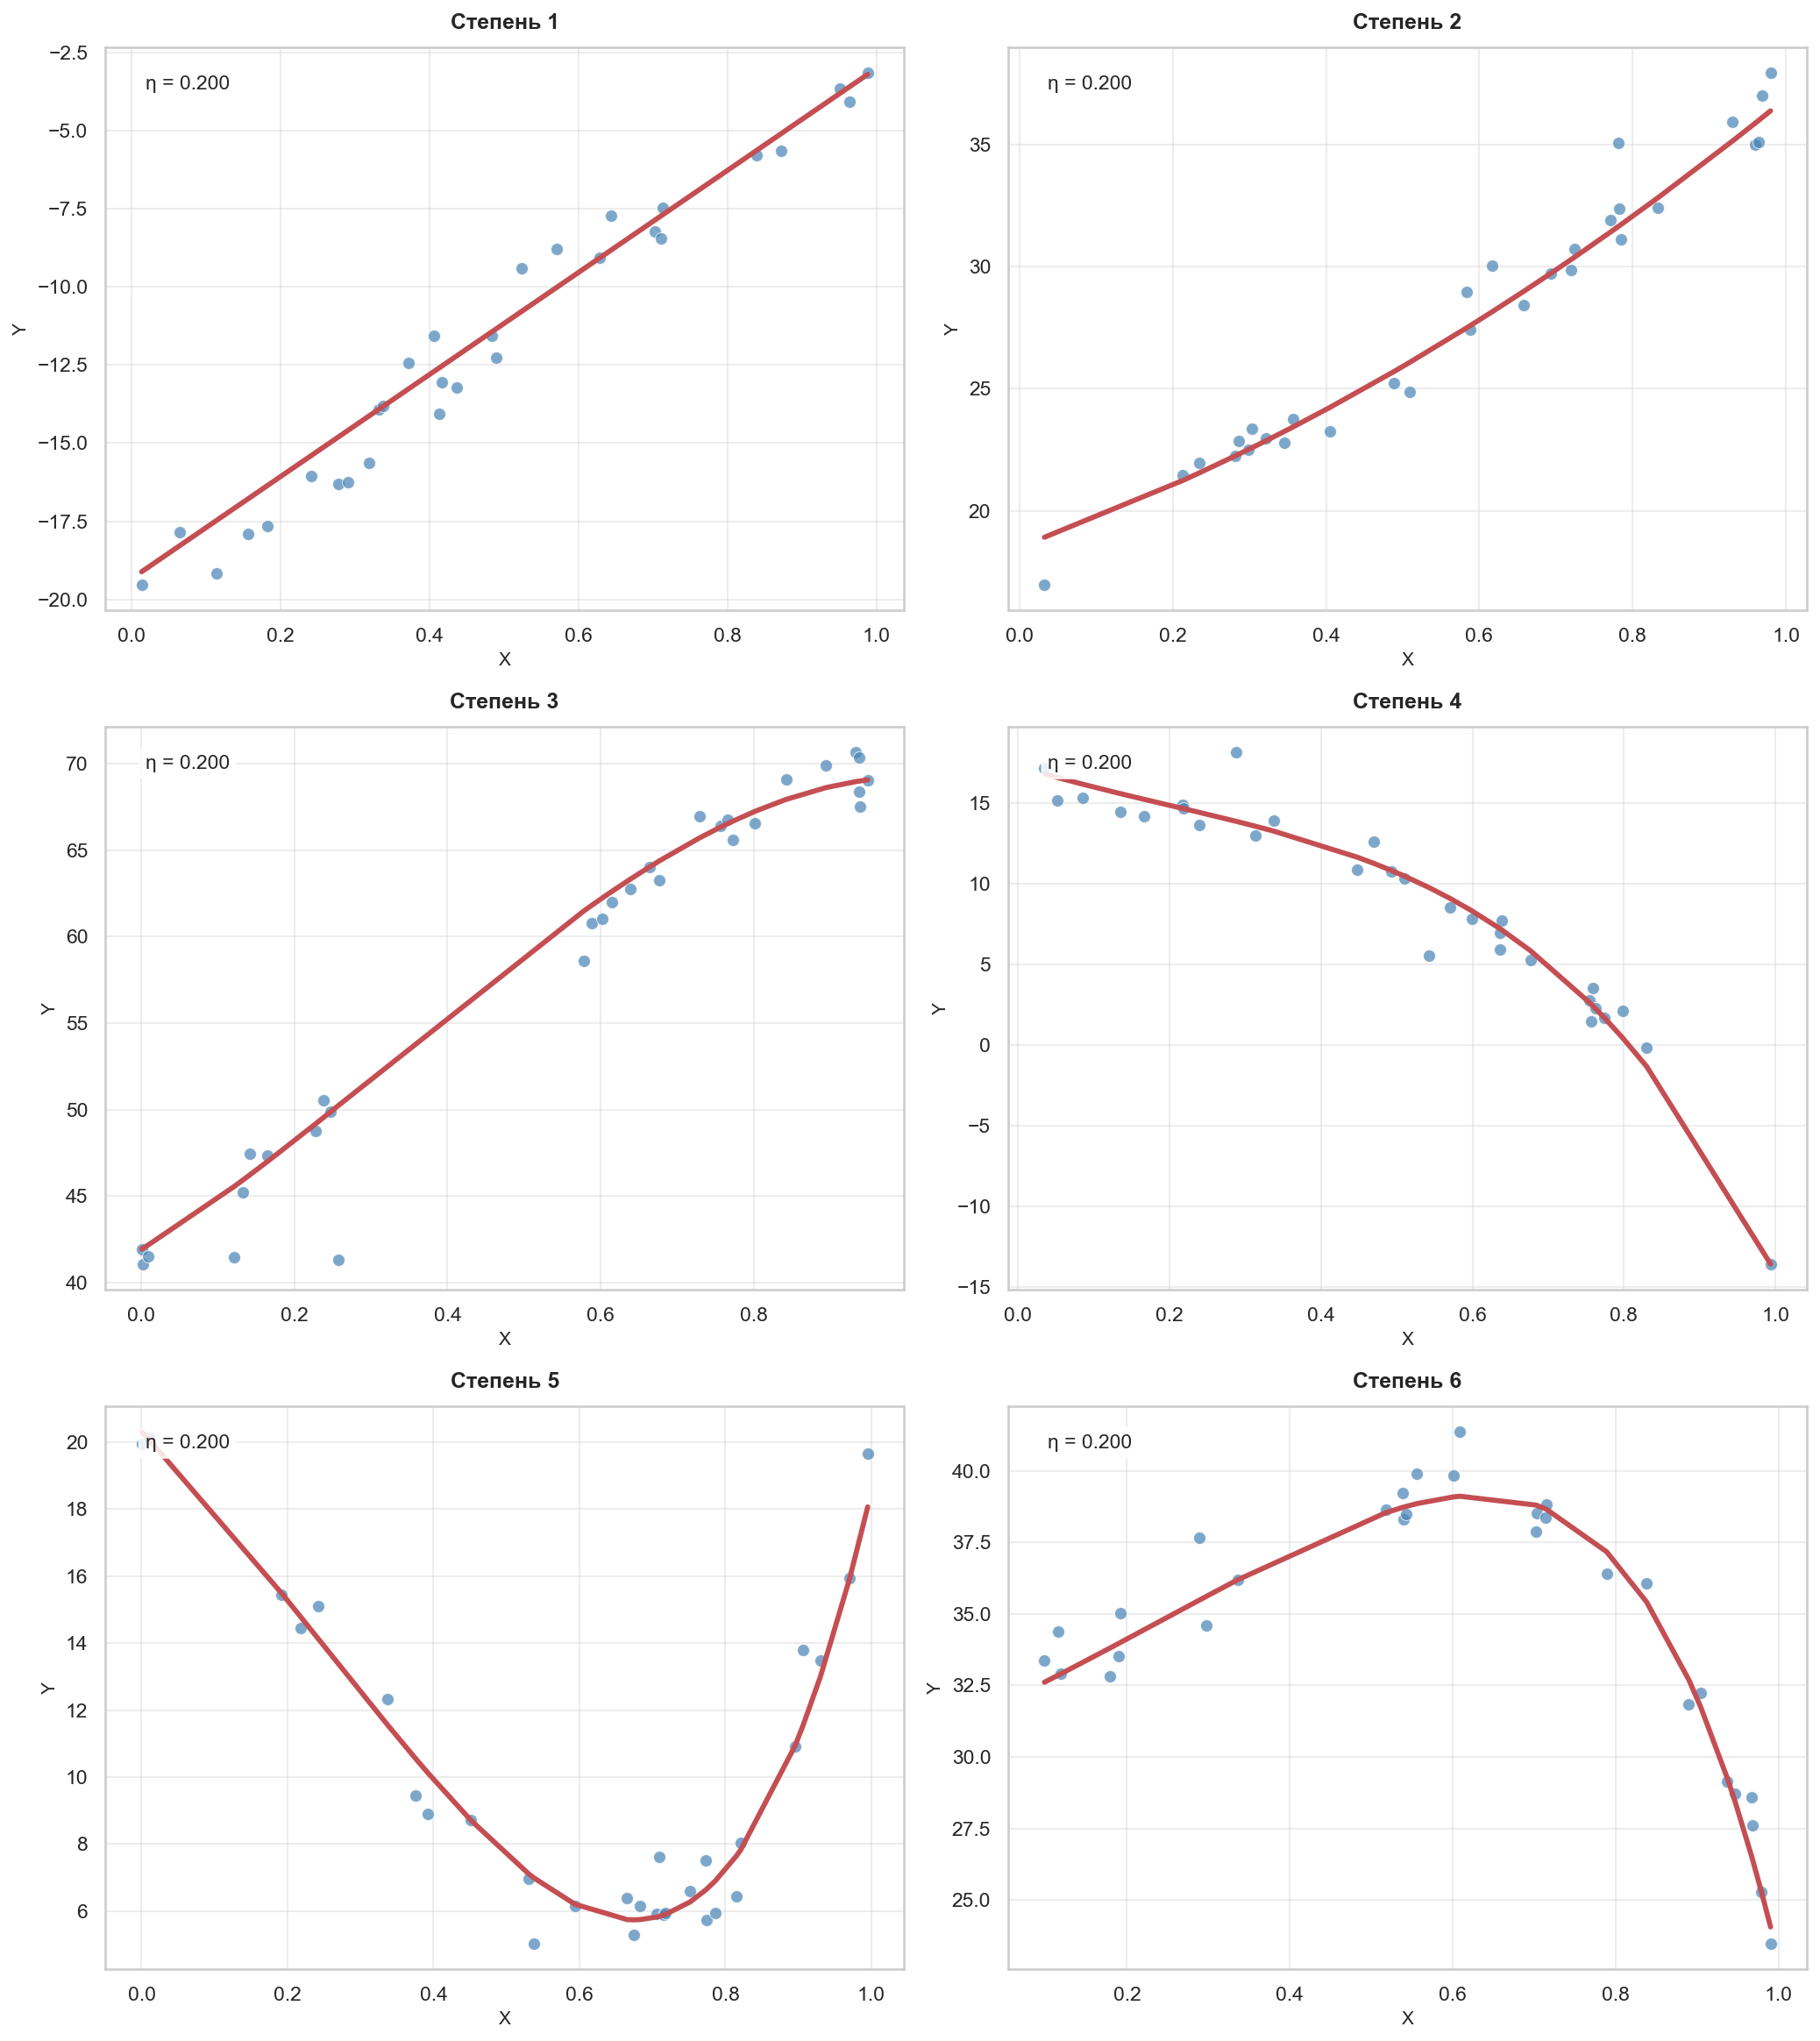

Сохранено: examples_moderate_noise.png
  Примеры для степеней 1-6 при moderate уровне шума



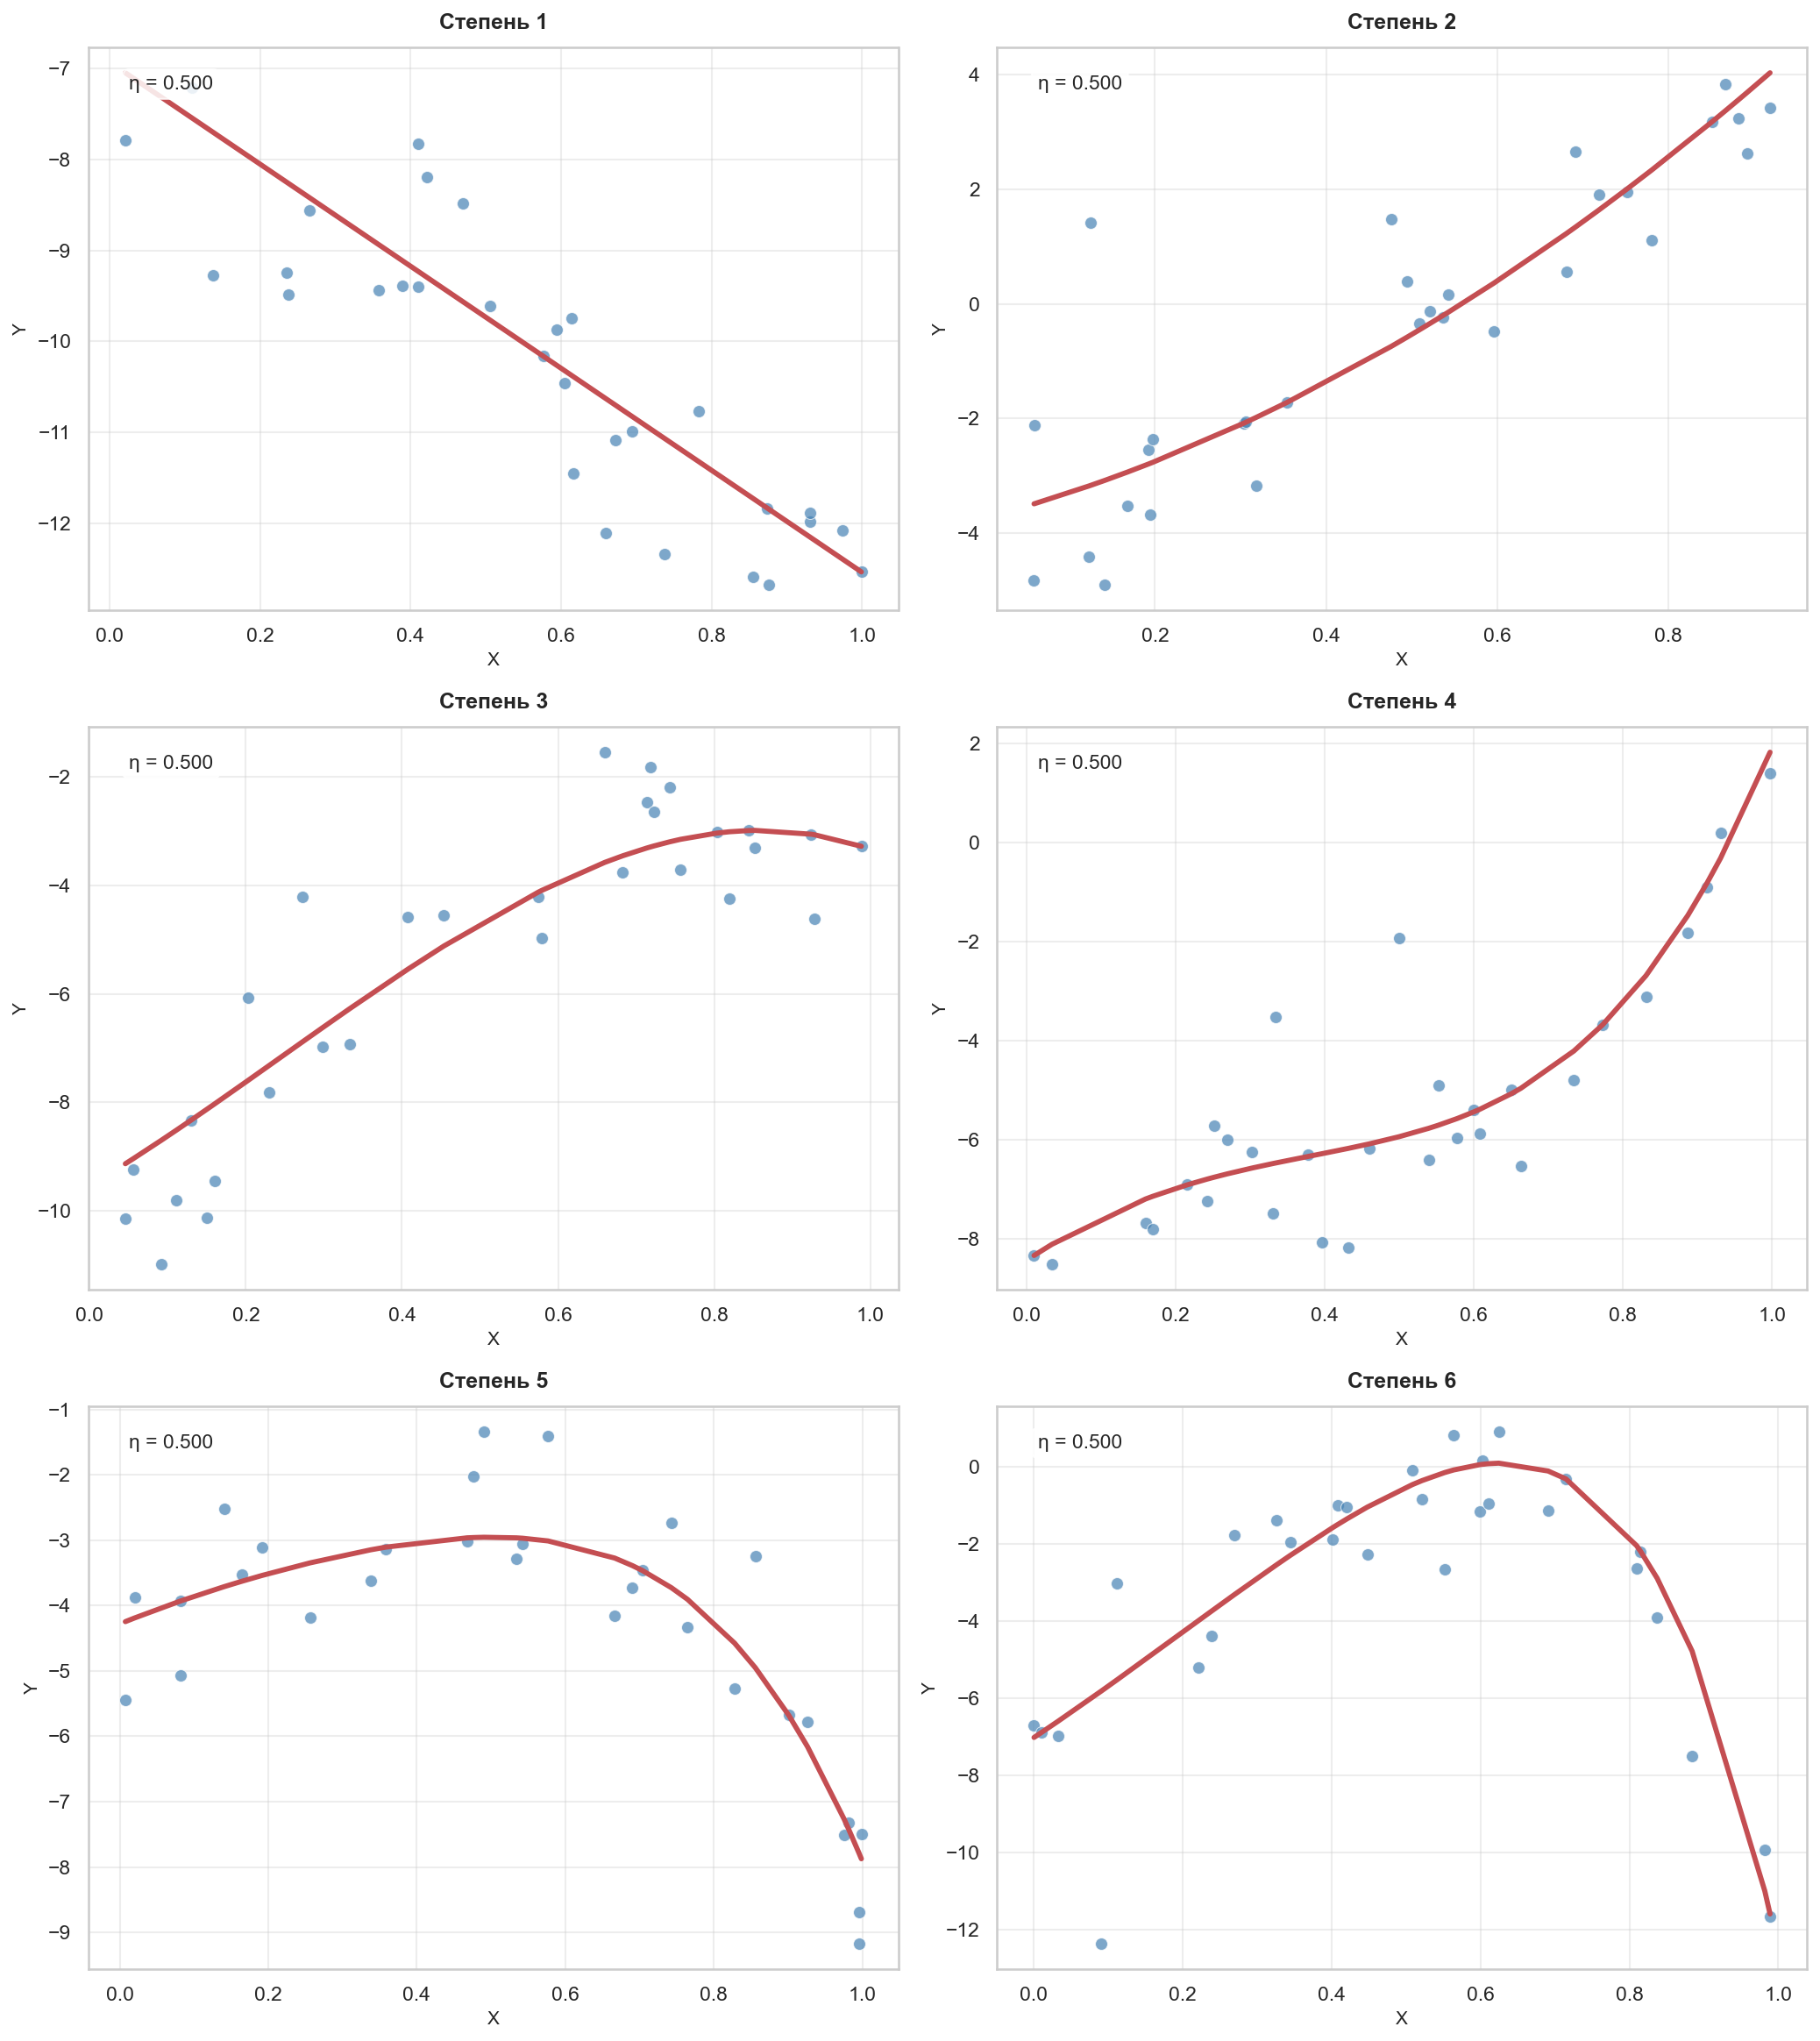

Сохранено: examples_high_noise.png
  Примеры для степеней 1-6 при high уровне шума

Распределение параметров генерации полиномов


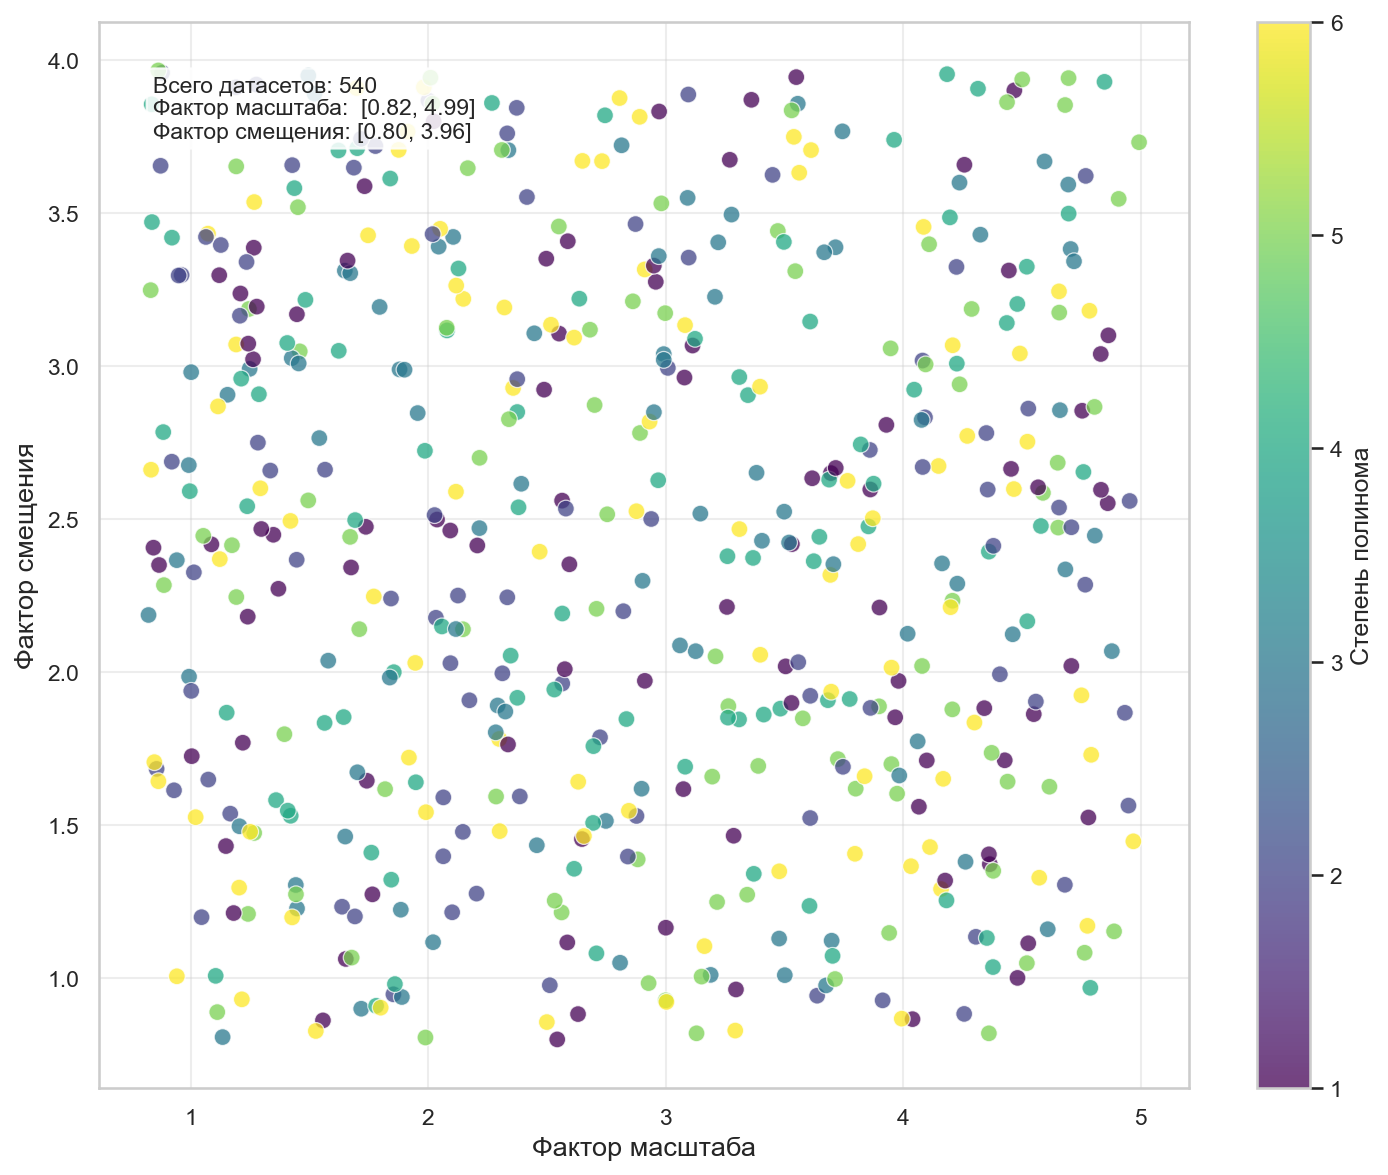

Сохранено: polynomial_generation_parameters.png

Отклонение фактического уровня шума η от целевого значения


C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_4832\4039775433.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=log_df, x='degree', y='deviation', ax=ax1, palette='Blues')
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_4832\4039775433.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=log_df, x='noise_level', y='deviation', ax=ax2,
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_4832\4039775433.py:131: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.98])
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_4832\4039775433.py:132: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MIN

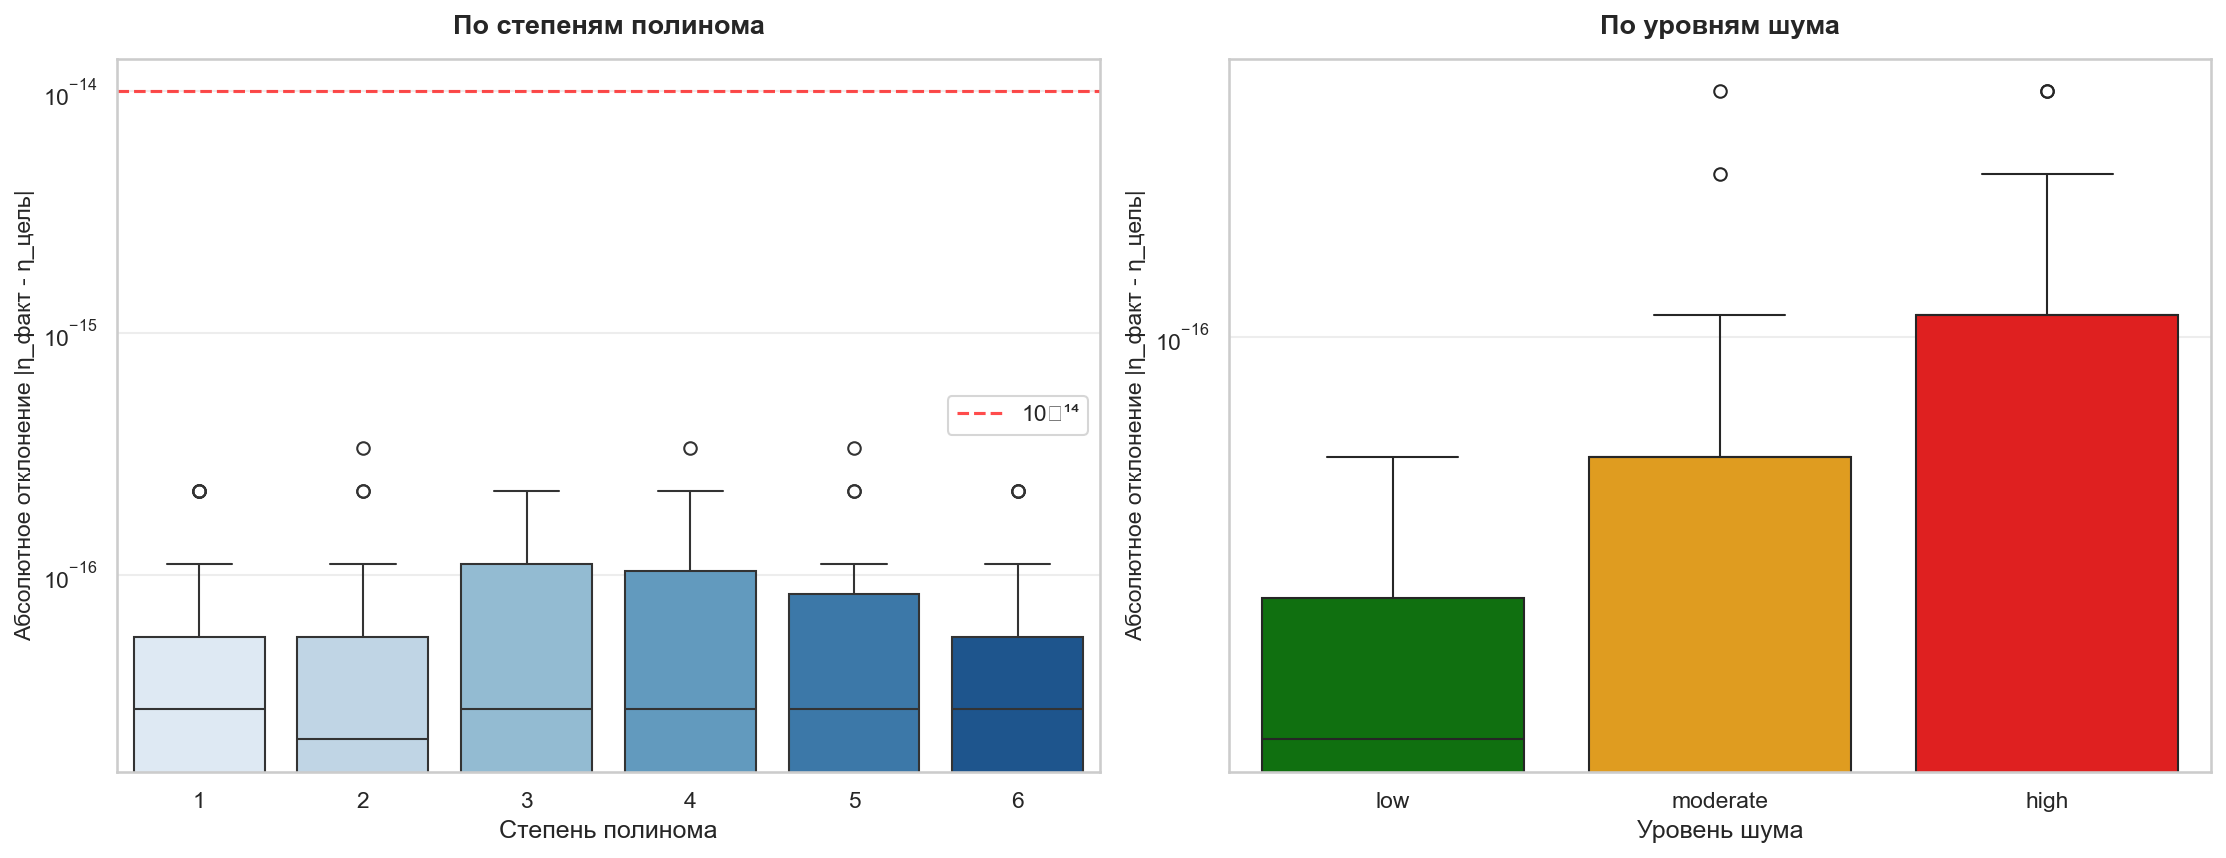

Сохранено: noise_level_deviation.png
  Максимальное отклонение: 3.33e-16
  Среднее отклонение: 4.45e-17

Распределение коэффициентов полиномов по степеням


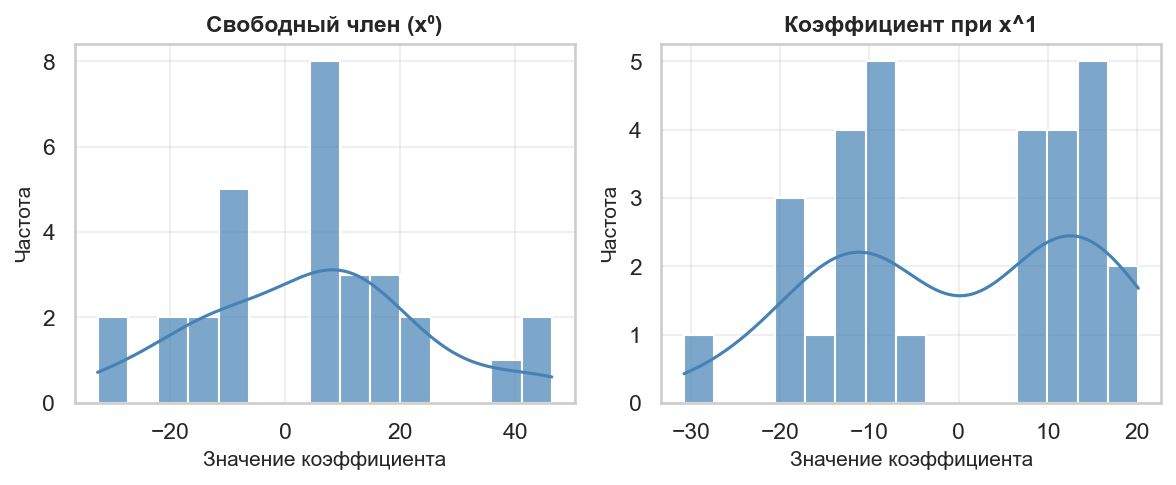

Сохранено: coefficients_distribution_deg1.png


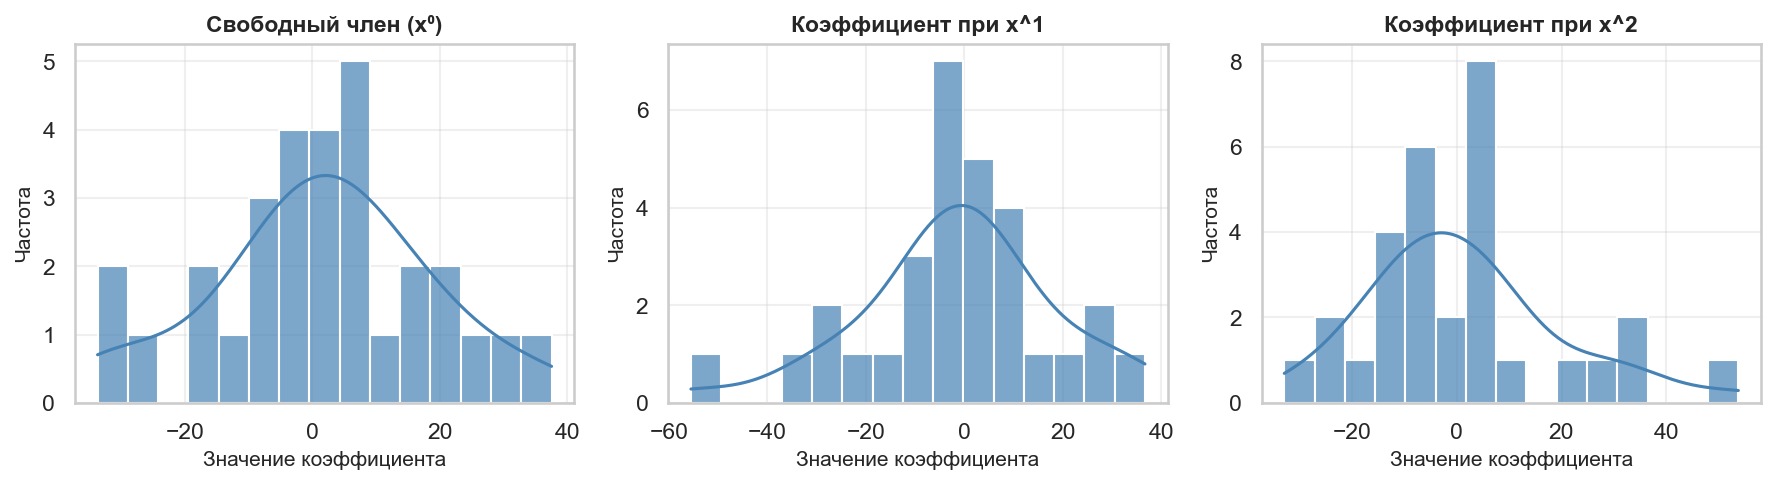

Сохранено: coefficients_distribution_deg2.png


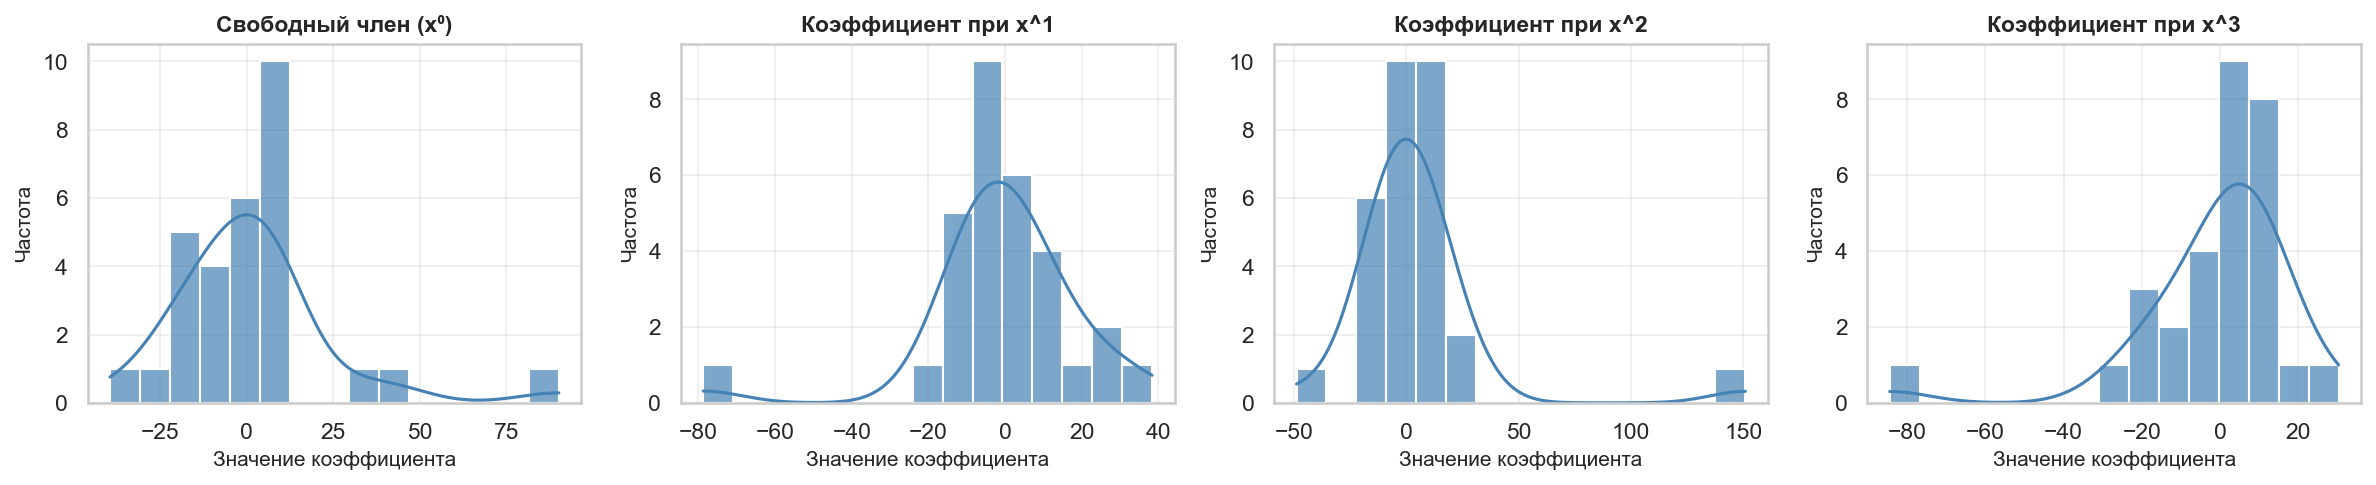

Сохранено: coefficients_distribution_deg3.png


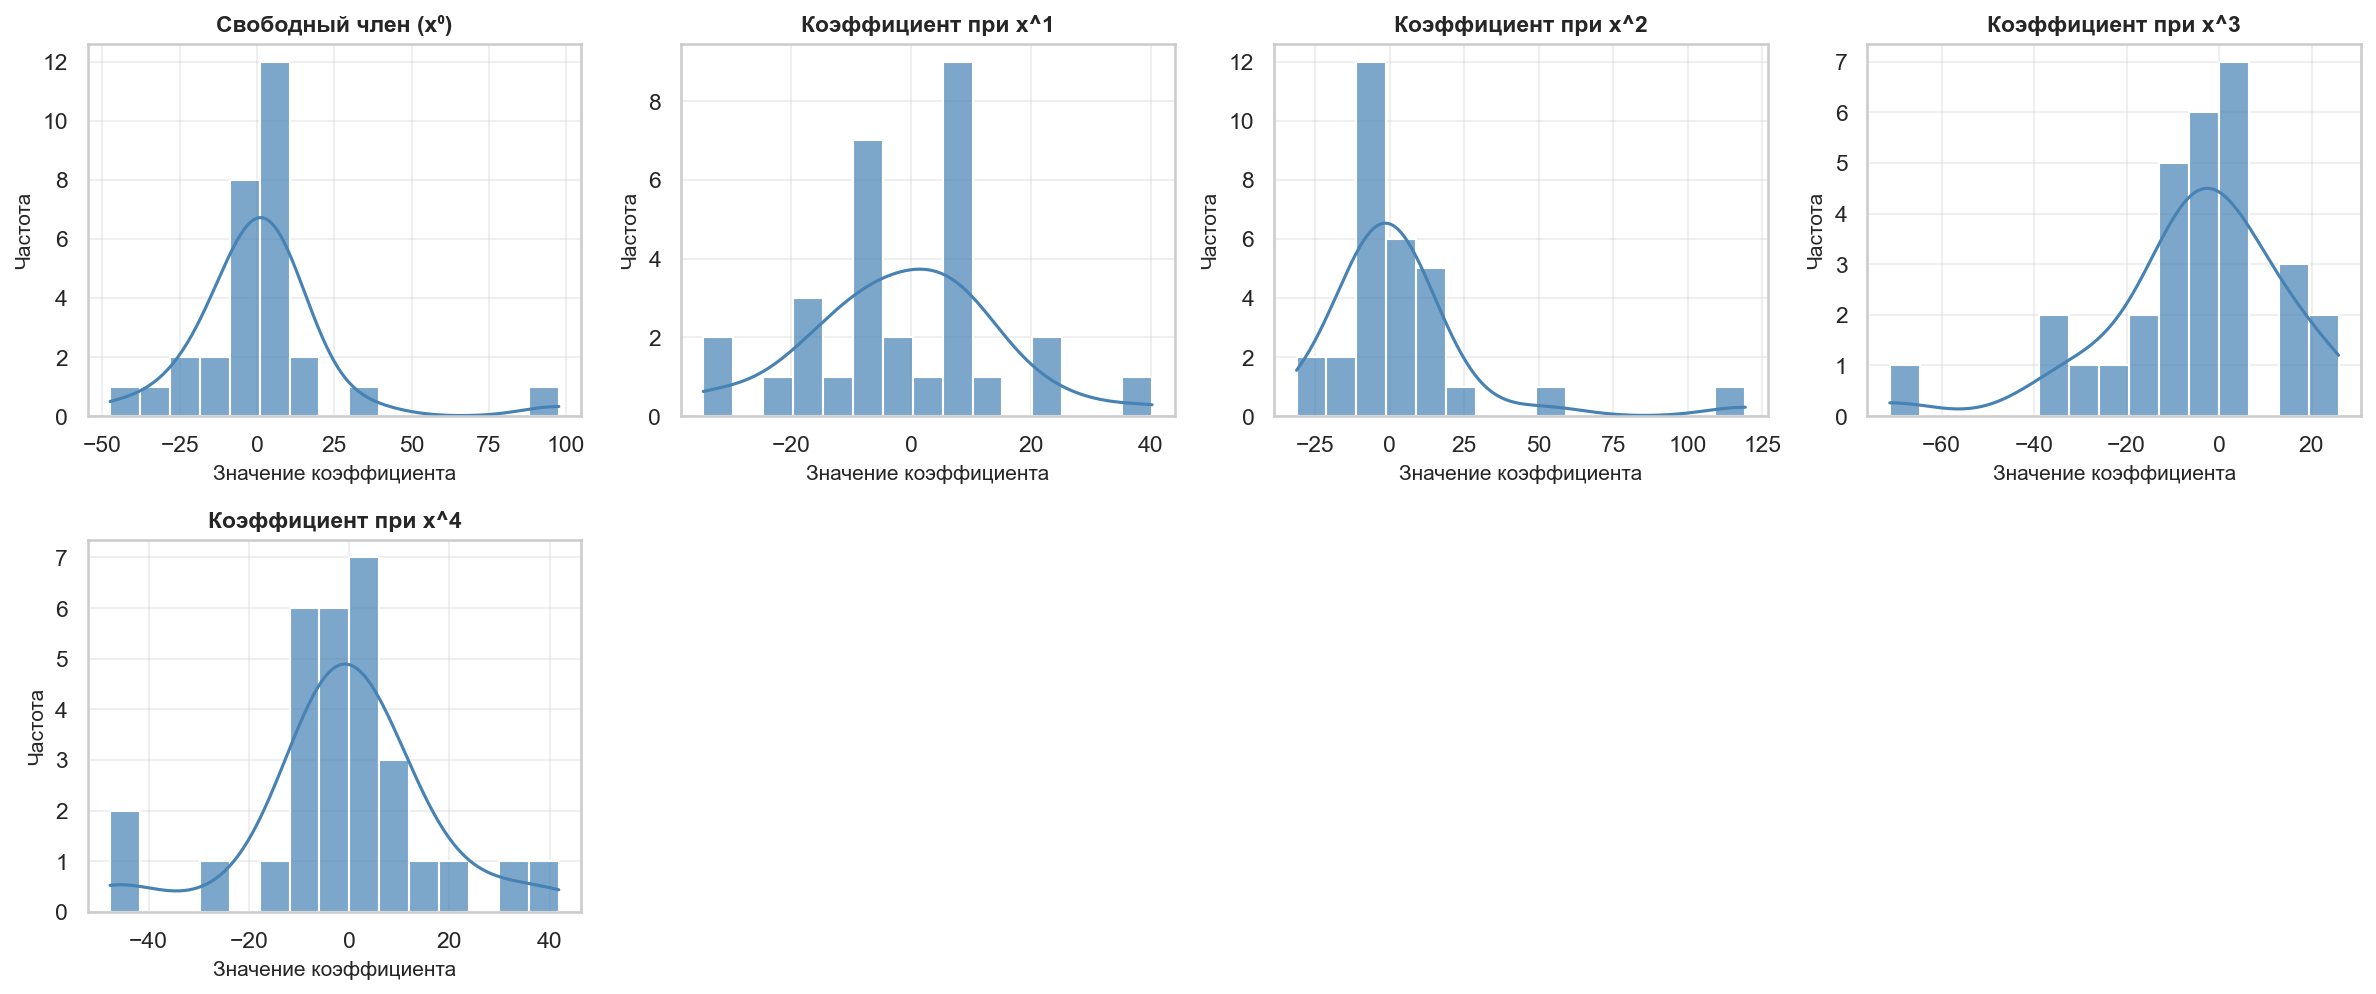

Сохранено: coefficients_distribution_deg4.png


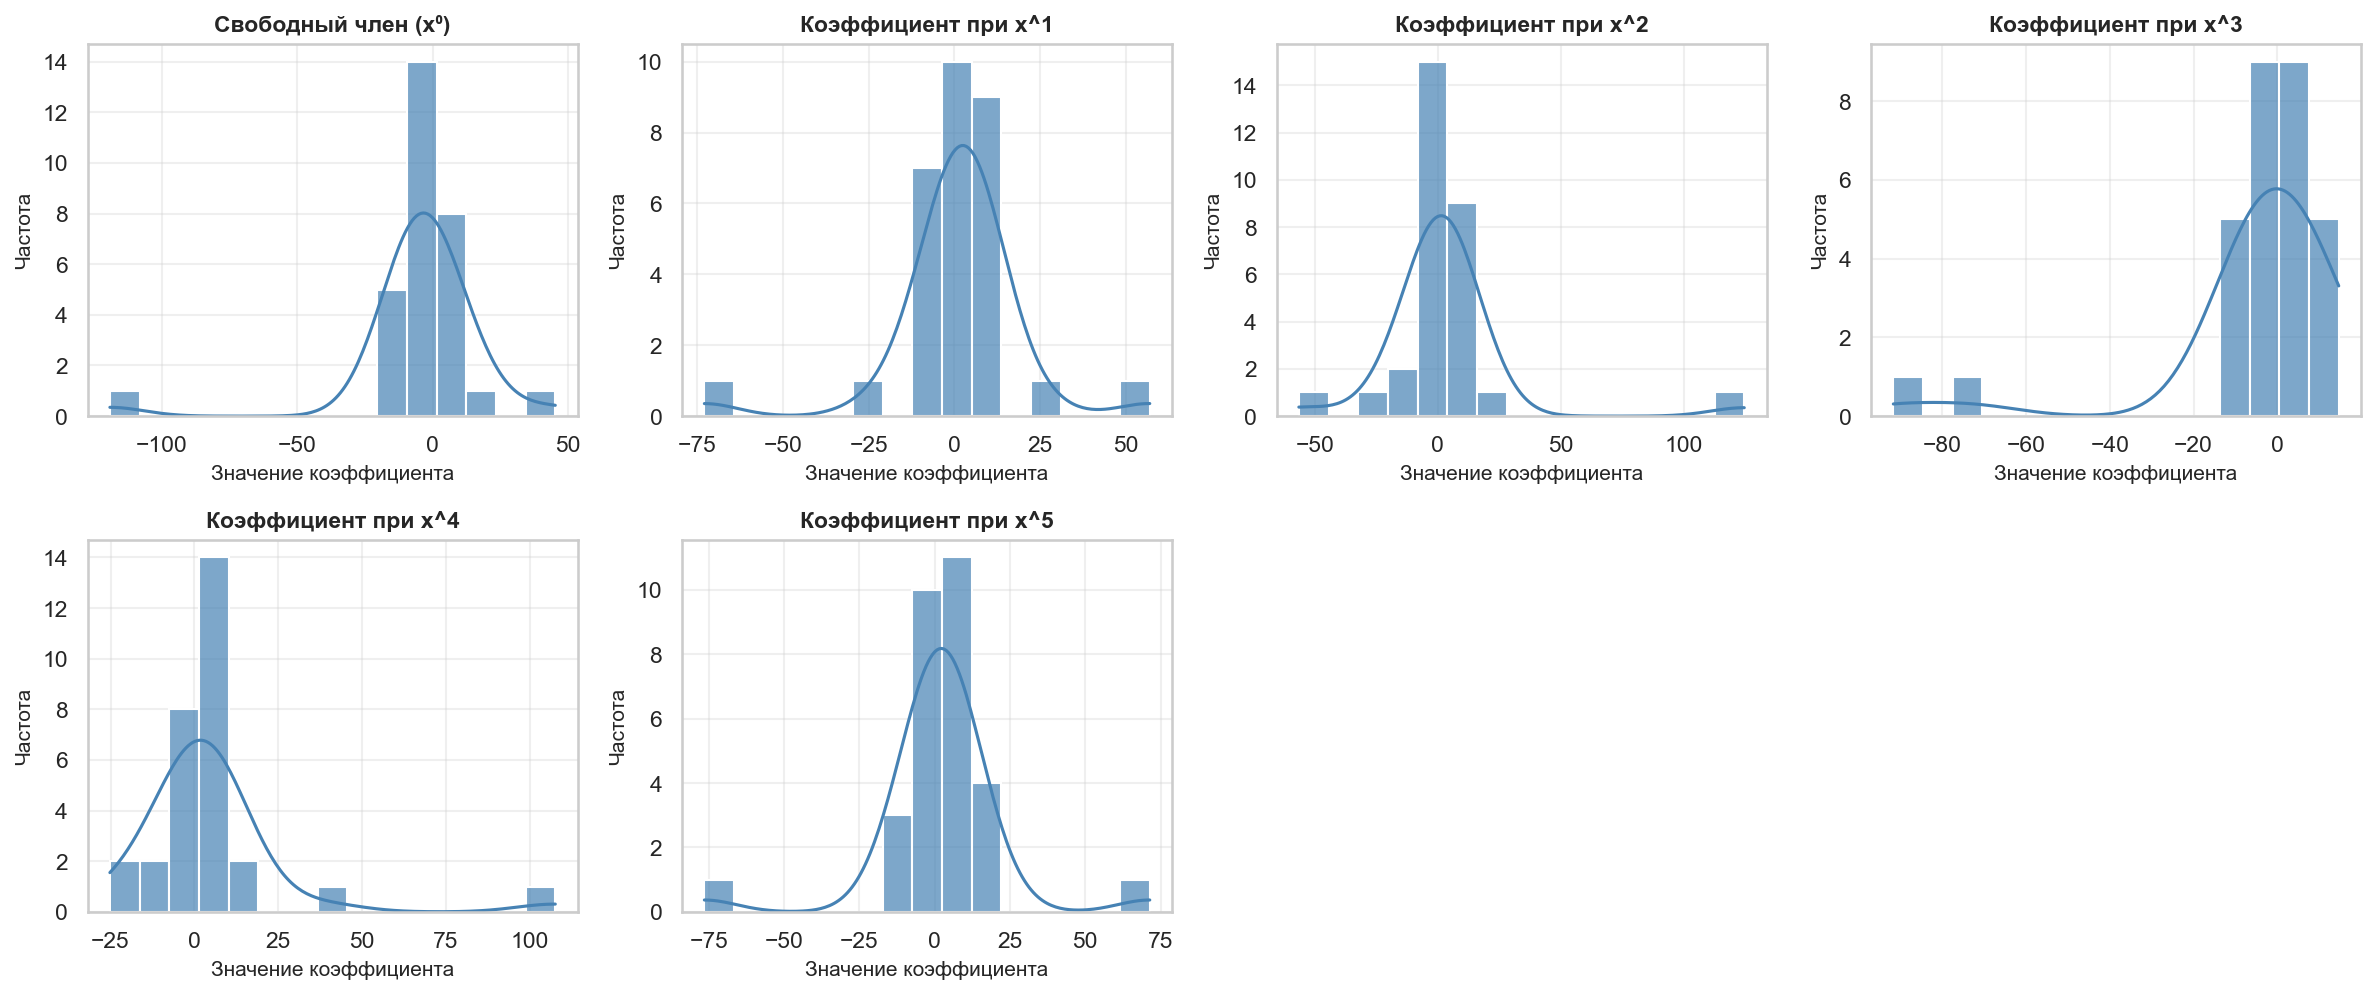

Сохранено: coefficients_distribution_deg5.png


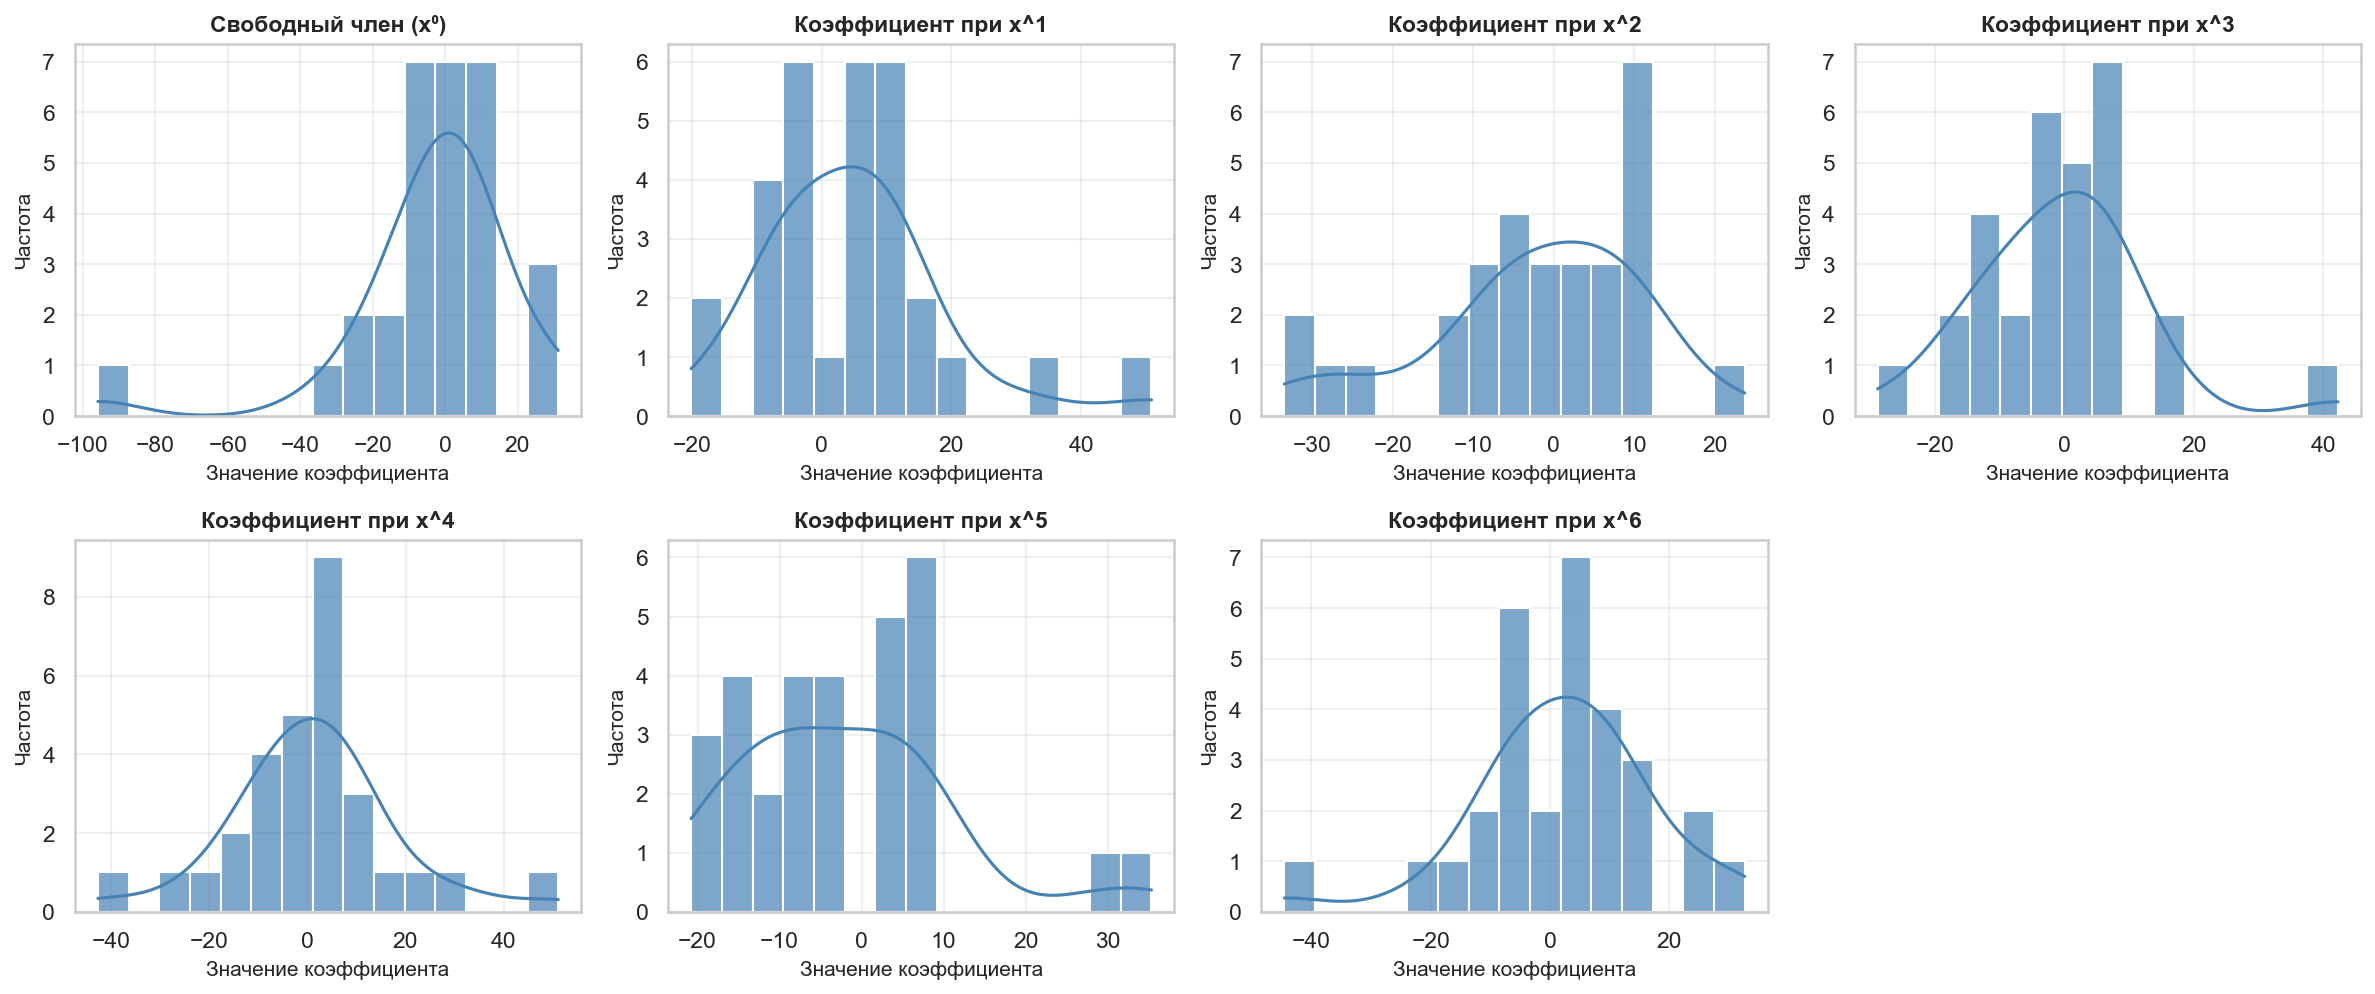

Сохранено: coefficients_distribution_deg6.png

Все визуализации успешно сохранены


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Загрузка логов и данных
log_df = pd.read_csv('synthetic_datasets_with_coeffs/seed_log.csv')
data_dir = Path('synthetic_datasets_with_coeffs')

# Настройка стиля
sns.set(style="whitegrid", font_scale=1.0)
plt.rcParams['figure.dpi'] = 150

# ============================================================================
# ВИЗУАЛИЗАЦИЯ 1: Примеры данных для каждого уровня шума (6 степеней)
# ============================================================================

noise_levels_config = [
    ('low', 'Низкий уровень шума (η ∈ [0.10, 0.20])'),
    ('moderate', 'Умеренный уровень шума (η ∈ [0.20, 0.40])'),
    ('high', 'Высокий уровень шума (η ∈ [0.50, 0.80])')
]

for noise_level, title_text in noise_levels_config:
    # Создаём сетку 3×2 для 6 степеней
    fig, axes = plt.subplots(3, 2, figsize=(14, 16))
    axes = axes.flatten()
    
    for degree in range(1, 7):
        ax = axes[degree-1]
        
        # Находим первую запись в логе для данной комбинации (уровень шума, степень)
        log_entry = log_df[(log_df['noise_level'] == noise_level) & 
                          (log_df['degree'] == degree)].iloc[0]
        seed_target = log_entry['seed']
        eta = log_entry['noise_actual']
        
        # Загружаем датасет и фильтруем по семени
        df = pd.read_csv(data_dir / f'noise_{noise_level}_deg{degree}.csv')
        df_sample = df[df['seed'] == seed_target].copy()
        df_sample = df_sample.sort_values('x')
        
        # Строим график
        ax.scatter(df_sample['x'], df_sample['y_noisy'], 
                  alpha=0.7, s=45, color='steelblue', edgecolors='w', linewidth=0.5)
        ax.plot(df_sample['x'], df_sample['y_true'], 
               'r-', linewidth=2.8)
        
        # Аннотация с уровнем шума
        ax.text(0.05, 0.95, f'η = {eta:.3f}', transform=ax.transAxes,
               fontsize=11, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))
        
        ax.set_title(f'Степень {degree}', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('X', fontsize=10)
        ax.set_ylabel('Y', fontsize=10)
        ax.grid(True, alpha=0.35)
    
    # plt.suptitle(title_text, fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.savefig(f'examples_{noise_level}_noise.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Сохранено: examples_{noise_level}_noise.png")
    print(f"  Примеры для степеней 1-6 при {noise_level} уровне шума")
    print()

# ============================================================================
# ВИЗУАЛИЗАЦИЯ 2: Распределение параметров генерации полиномов
# ============================================================================

print("Распределение параметров генерации полиномов")
print("=" * 70)

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(log_df['coeff_scale'], log_df['coeff_offset'], 
                    c=log_df['degree'], cmap='viridis', 
                    s=65, alpha=0.75, edgecolors='w', linewidth=0.6)

ax.set_xlabel('Фактор масштаба', fontsize=13)
ax.set_ylabel('Фактор смещения', fontsize=13)
ax.grid(True, alpha=0.35)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Степень полинома', fontsize=12)

stats_text = (f"Всего датасетов: {len(log_df)}\n"
              f"Фактор масштаба:  [{log_df['coeff_scale'].min():.2f}, {log_df['coeff_scale'].max():.2f}]\n"
              f"Фактор смещения: [{log_df['coeff_offset'].min():.2f}, {log_df['coeff_offset'].max():.2f}]")
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))

plt.tight_layout()
plt.savefig('polynomial_generation_parameters.png', dpi=300, bbox_inches='tight')
plt.show()

print("Сохранено: polynomial_generation_parameters.png")
print()

# ============================================================================
# ВИЗУАЛИЗАЦИЯ 3: Отклонение уровня шума от целевого значения
# ============================================================================

print("Отклонение фактического уровня шума η от целевого значения")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 3.1 Отклонение по степеням
sns.boxplot(data=log_df, x='degree', y='deviation', ax=ax1, palette='Blues')
ax1.set_yscale('log')
ax1.set_title('По степеням полинома', fontsize=13, fontweight='bold', pad=12)
ax1.set_xlabel('Степень полинома', fontsize=12)
ax1.set_ylabel('Абсолютное отклонение |η_факт - η_цель|', fontsize=11)
ax1.grid(True, alpha=0.35, axis='y')
ax1.axhline(y=1e-14, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='10⁻¹⁴')
ax1.legend()

# 3.2 Отклонение по уровням шума
colors = {'low': 'green', 'moderate': 'orange', 'high': 'red'}
sns.boxplot(data=log_df, x='noise_level', y='deviation', ax=ax2,
            palette=[colors[lvl] for lvl in ['low', 'moderate', 'high']])
ax2.set_yscale('log')
ax2.set_title('По уровням шума', fontsize=13, fontweight='bold', pad=12)
ax2.set_xlabel('Уровень шума', fontsize=12)
ax2.set_ylabel('Абсолютное отклонение |η_факт - η_цель|', fontsize=11)
ax2.grid(True, alpha=0.35, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('noise_level_deviation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Сохранено: noise_level_deviation.png")
print(f"  Максимальное отклонение: {log_df['deviation'].max():.2e}")
print(f"  Среднее отклонение: {log_df['deviation'].mean():.2e}")
print()

# ============================================================================
# ВИЗУАЛИЗАЦИЯ 4: Гистограммы распределения коэффициентов полиномов
# ============================================================================

print("Распределение коэффициентов полиномов по степеням")
print("=" * 70)

for degree in range(1, 7):
    df = pd.read_csv(data_dir / f'noise_moderate_deg{degree}.csv')
    unique_seeds = df['seed'].unique()[:30]
    coefficients = {f'coeff_{i}': [] for i in range(degree + 1)}
    
    for seed in unique_seeds:
        row = df[df['seed'] == seed].iloc[0]
        for i in range(degree + 1):
            coefficients[f'coeff_{i}'].append(row[f'coeff_{i}'])
    
    n_coeffs = degree + 1
    cols = min(4, n_coeffs)
    rows = (n_coeffs + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
    if n_coeffs > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for i in range(n_coeffs):
        ax = axes[i]
        sns.histplot(coefficients[f'coeff_{i}'], bins=15, kde=True, 
                    color='steelblue', alpha=0.7, ax=ax)
        ax.set_title(f'Коэффициент при x^{i}' if i > 0 else 'Свободный член (x⁰)', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Значение коэффициента', fontsize=10)
        ax.set_ylabel('Частота', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    for i in range(n_coeffs, len(axes)):
        axes[i].set_visible(False)
    
    # plt.suptitle(f'Распределение коэффициентов полинома {degree}-й степени\n(30 датасетов, умеренный шум)', 
    #             fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig(f'coefficients_distribution_deg{degree}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Сохранено: coefficients_distribution_deg{degree}.png")

print()
print("=" * 70)
print("Все визуализации успешно сохранены")
print("=" * 70)

# Генерация двумерной смеси

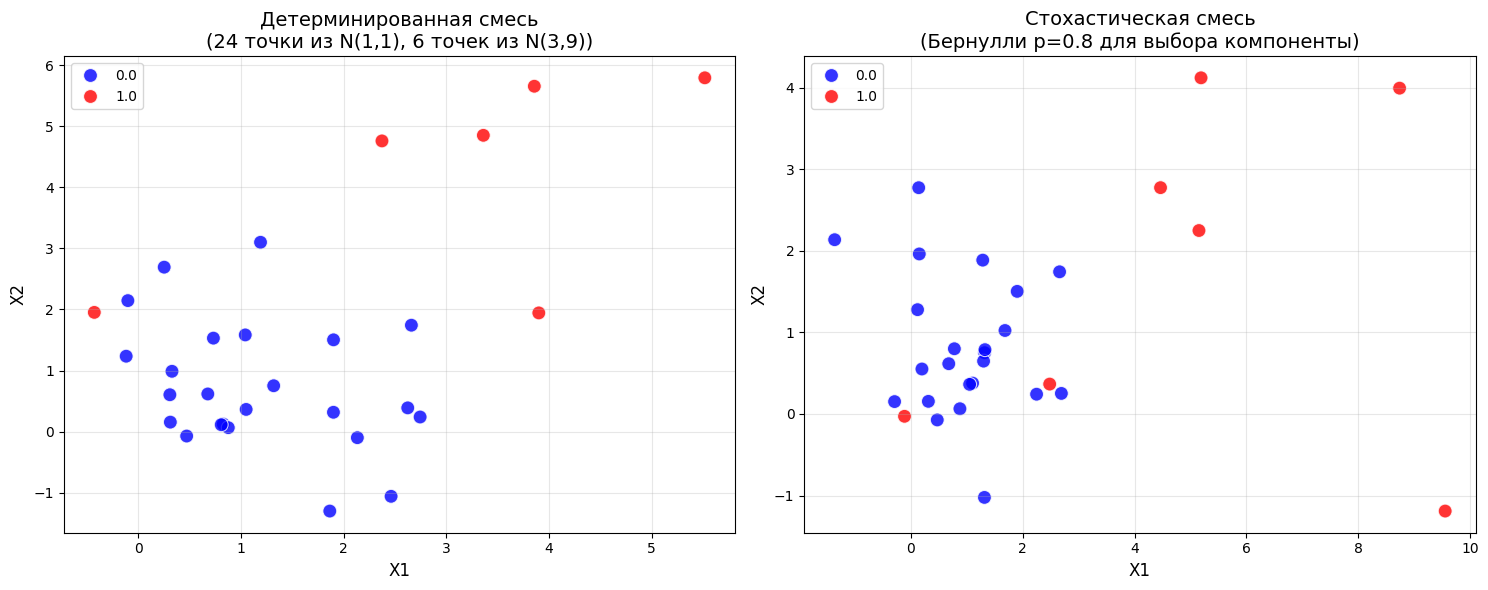

Статистика детерминированной смеси:
Точек из первого распределения: 24 (ожидалось 24)
Точек из второго распределения: 6 (ожидалось 6)

Статистика стохастической смеси:
Точек из первого распределения: 23 (ожидалось ~24)
Точек из второго распределения: 7 (ожидалось ~6)
Фактическое соотношение: 0.77:0.23


In [4]:
import numpy as np
from scipy.stats import multivariate_normal, bernoulli

def generate_deterministic_mixture(seed):
    """
    Генерирует детерминированную смесь: 24 точки из первого распределения и 6 из второго.
    
    Parameters:
    seed (int): Seed для воспроизводимости
    
    Returns:
    np.array: Датасет из 30 точек (30, 2)
    np.array: Метки компонент (0 - первое распределение, 1 - второе)
    """
    np.random.seed(seed)
    
    # Параметры распределений
    mean1 = np.array([1, 1])
    cov1 = np.diag([1, 1])  # Диагональная матрица ковариаций
    
    mean2 = np.array([3, 3])
    cov2 = np.diag([9, 9])  # Диагональная матрица ковариаций
    
    # Генерируем точки
    points1 = multivariate_normal.rvs(mean=mean1, cov=cov1, size=24)
    points2 = multivariate_normal.rvs(mean=mean2, cov=cov2, size=6)
    
    # Создаем метки компонент
    labels1 = np.zeros(24)  # 0 для первого распределения
    labels2 = np.ones(6)    # 1 для второго распределения
    
    # Объединяем точки и метки
    X = np.vstack([points1, points2])
    labels = np.concatenate([labels1, labels2])
    
    # Перемешиваем точки и соответствующие метки
    shuffle_idx = np.random.permutation(len(X))
    X = X[shuffle_idx]
    labels = labels[shuffle_idx]
    
    return X, labels


def generate_stochastic_mixture(seed):
    """
    Генерирует стохастическую смесь: для каждой точки случайно выбирается компонента.
    
    Parameters:
    seed (int): Seed для воспроизводимости
    
    Returns:
    np.array: Датасет из 30 точек (30, 2)
    np.array: Метки компонент (0 - первое распределение, 1 - второе)
    """
    np.random.seed(seed)
    
    # Параметры распределений
    mean1 = np.array([1, 1])
    cov1 = np.diag([1, 1])
    
    mean2 = np.array([3, 3])
    cov2 = np.diag([9, 9])
    
    # Инициализируем массивы для точек и меток
    X = np.zeros((30, 2))
    labels = np.zeros(30)
    
    # Для каждой точки случайно выбираем компоненту
    for i in range(30):
        # Бернуллиевское распределение с p=0.8 для первой компоненты
        component = bernoulli.rvs(p=0.2)
        labels[i] = component
        
        if component == 0:  # Первая компонента
            X[i] = multivariate_normal.rvs(mean=mean1, cov=cov1)
        else:  # Вторая компонента
            X[i] = multivariate_normal.rvs(mean=mean2, cov=cov2)
    
    return X, labels


# Пример использования и визуализации
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Генерируем данные
    X_det, labels_det = generate_deterministic_mixture(seed=1)
    X_stoch, labels_stoch = generate_stochastic_mixture(seed=1)
    
    # Визуализация
    plt.figure(figsize=(15, 6))
    
    # Детерминированная смесь
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_det[:, 0], y=X_det[:, 1], hue=labels_det, 
                    palette=['blue', 'red'], s=100, alpha=0.8)
    plt.title('Детерминированная смесь\n(24 точки из N(1,1), 6 точек из N(3,9))', fontsize=14)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Стохастическая смесь
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_stoch[:, 0], y=X_stoch[:, 1], hue=labels_stoch, 
                    palette=['blue', 'red'], s=100, alpha=0.8)
    plt.title('Стохастическая смесь\n(Бернулли p=0.8 для выбора компоненты)', fontsize=14)
    plt.xlabel('X1', fontsize=12)
    plt.ylabel('X2', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('mixture_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Статистика для детерминированной смеси
    count1_det = np.sum(labels_det == 0)
    count2_det = np.sum(labels_det == 1)
    
    # Статистика для стохастической смеси
    count1_stoch = np.sum(labels_stoch == 0)
    count2_stoch = np.sum(labels_stoch == 1)
    
    print("Статистика детерминированной смеси:")
    print(f"Точек из первого распределения: {count1_det} (ожидалось 24)")
    print(f"Точек из второго распределения: {count2_det} (ожидалось 6)")
    
    print("\nСтатистика стохастической смеси:")
    print(f"Точек из первого распределения: {count1_stoch} (ожидалось ~24)")
    print(f"Точек из второго распределения: {count2_stoch} (ожидалось ~6)")
    print(f"Фактическое соотношение: {count1_stoch/30:.2f}:{count2_stoch/30:.2f}")

## Функция истинной регрессии

In [5]:
import numpy as np

def true_regression_function(x):
    num = 24 * np.exp(-((x - 1)**2) / 2)
    denom = num + np.exp(-((x - 3)**2) / 18)
    return 3 - num / denom

def true_regression_vectorized(x):
    num = 24 * np.exp(-np.square(x - 1) / 2)
    denom = num + np.exp(-np.square(x - 3) / 18)
    return 3 - num / denom

# Для синтетических датасетов

## Интегральный MSE

In [6]:
from scipy.integrate import quad
import numpy as np

def integral_mse(g_hat, g_true, a=-2, b=8, epsabs=1e-5):
    """
    Вычисляет интегральный MSE: (1/(b-a)) * ∫[a,b] (ĝ(x) - g(x))² dx
    
    Параметры:
    g_hat : callable
        Оценённая регрессия (принимает float, возвращает float)
    g_true : callable
        Истинная регрессия (принимает float, возвращает float)
    a, b : float, optional
        Границы интегрирования (по умолчанию [-2, 8])
    epsabs : float, optional
        Абсолютная точность интегрирования (по умолчанию 1e-5)
    
    Возвращает:
    float
        Значение интегрального MSE
    """
    integrand = lambda x: (g_hat(x) - g_true(x)) ** 2
    integral, _ = quad(integrand, a, b, epsabs=epsabs)
    return integral / (b - a)

## Интегральный MAE

In [7]:
def integral_mae(g_hat, g_true, a=-2, b=8, epsabs=1e-5):
    """
    Вычисляет интегральный MAE: (1/(b-a)) * ∫[a,b] |ĝ(x) - g(x)| dx
    
    Параметры и возвращает:
    То же, что и integral_mse
    """
    integrand = lambda x: abs(g_hat(x) - g_true(x))
    integral, _ = quad(integrand, a, b, epsabs=epsabs)
    return integral / (b - a)

## Максимальная ошибка (MaxErr)

In [8]:
from scipy.optimize import minimize_scalar

def max_error(g_hat, g_true, a=-2, b=8, xatol=1e-5):
    """
    Вычисляет максимальную ошибку: max_{x ∈ [a,b]} |ĝ(x) - g(x)|
    
    Параметры:
    xatol : float, optional
        Абсолютная точность поиска максимума (по умолчанию 1e-5)
    
    Возвращает:
    float
        Значение максимальной ошибки
    """
    # Функция для минимизации: отрицание модуля ошибки
    objective = lambda x: -abs(g_hat(x) - g_true(x))
    
    # Надёжный поиск максимума на интервале
    result = minimize_scalar(
        objective,
        bounds=(a, b),
        method='bounded',
        options={'xatol': xatol}
    )
    
    # Гарантируем корректность даже при сбое оптимизации
    if not result.success:
        # Резерв: оценка на сетке из 100 точек
        x_grid = np.linspace(a, b, 100)
        errors = [abs(g_hat(x) - g_true(x)) for x in x_grid]
        return max(errors)
    
    return -result.fun  # Возвращаем положительное значение ошибки

# Проверка метрик для смеси

In [9]:
import numpy as np
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import KFold
from scipy.optimize import minimize

def kernel_regression_silverman(x_train, y_train, x_test):
    x_train = np.asarray(x_train).reshape(-1, 1)
    h = 1.06 * np.std(x_train) * len(x_train)**(-1/5)
    kr = KernelReg(y_train, x_train, var_type='c', bw=[h])
    return kr.fit(x_test.reshape(-1, 1))[0]

def kernel_regression_cv(x_train, y_train, x_test):
    x_train = np.asarray(x_train).reshape(-1, 1)
    x_test = np.asarray(x_test).reshape(-1, 1)
    kf = KFold(5)
    
    def cv_mse(log_h):
        h = np.exp(log_h)
        total_mse = 0
        for train_idx, val_idx in kf.split(x_train):
            kr = KernelReg(y_train[train_idx], x_train[train_idx], var_type='c', bw=[h])
            pred = kr.fit(x_train[val_idx])[0]
            total_mse += np.mean((pred - y_train[val_idx])**2)
        return total_mse / kf.n_splits
    
    h_init = np.log(1.06 * np.std(x_train) * len(x_train)**(-1/5))
    res = minimize(cv_mse, x0=h_init, method='L-BFGS-B')
    best_h = np.exp(res.x[0])
    
    kr_final = KernelReg(y_train, x_train, var_type='c', bw=[best_h])
    return kr_final.fit(x_test)[0]

C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_26600\730382452.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(integrand, a, b, epsabs=epsabs)
C:\Users\M A C H R E A T O R\AppData\Local\Temp\ipykernel_26600\3121617411.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from

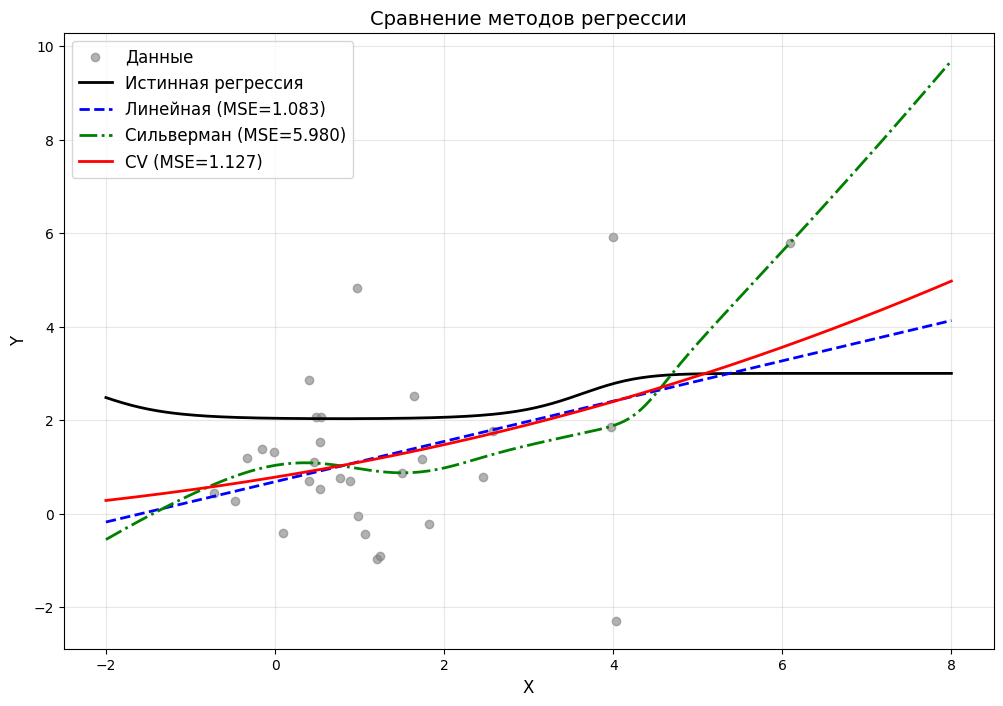


Результаты метрик:
------------------------------------------------------------
Метод        | MSE        | MAE        | MAX       
------------------------------------------------------------
Линейная     | 1.083038 | 0.814488 | 2.661939
Сильверман   | 5.979687 | 1.884082 | 1.167414
CV           | 1.126799 | 0.893124 | 2.200899


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Генерация данных
X, _ = generate_deterministic_mixture(seed=42)
x_train = X[:, 0].ravel()  # X как предиктор (1D массив)
y_train = X[:, 1]  # Y как целевая переменная

# 1. Линейная регрессия (МНК)
lr = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
g_lr = lambda x: lr.predict(np.array([[x]]))[0]

# 2. Ядерная регрессия с правилом Сильвермана
x_grid = np.linspace(-2, 8, 200)
y_silverman = kernel_regression_silverman(x_train, y_train, x_grid)
g_silverman = lambda x: np.interp(x, x_grid, y_silverman)

# 3. Ядерная регрессия с CV подбором h
y_cv = kernel_regression_cv(x_train, y_train, x_grid)
g_cv = lambda x: np.interp(x, x_grid, y_cv)

# 4. Истинная регрессия
g_true = true_regression_function

# 5. Расчет метрик
metrics = {}
for name, g_hat in [
    ('Линейная', g_lr),
    ('Сильверман', g_silverman),
    ('CV', g_cv)
]:
    metrics[name] = {
        'MSE': integral_mse(g_hat, g_true),
        'MAE': integral_mae(g_hat, g_true),
        'MAX': max_error(g_hat, g_true)
    }

# 6. Визуализация
y_true = true_regression_vectorized(x_grid)

plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, alpha=0.6, label='Данные', color='gray')
plt.plot(x_grid, y_true, 'k-', linewidth=2, label='Истинная регрессия')
plt.plot(x_grid, lr.predict(x_grid.reshape(-1, 1)), 'b--', linewidth=2, 
         label=f'Линейная (MSE={metrics["Линейная"]["MSE"]:.3f})')
plt.plot(x_grid, y_silverman, 'g-.', linewidth=2, 
         label=f'Сильверман (MSE={metrics["Сильверман"]["MSE"]:.3f})')
plt.plot(x_grid, y_cv, 'r-', linewidth=2, 
         label=f'CV (MSE={metrics["CV"]["MSE"]:.3f})')
plt.legend(fontsize=12)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Сравнение методов регрессии', fontsize=14)
plt.grid(alpha=0.3)
plt.savefig('regression_comparison_new.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Вывод результатов
print("\nРезультаты метрик:")
print("-" * 60)
print(f"{'Метод':<12} | {'MSE':<10} | {'MAE':<10} | {'MAX':<10}")
print("-" * 60)
for name, vals in metrics.items():
    print(f"{name:<12} | {vals['MSE']:.6f} | {vals['MAE']:.6f} | {vals['MAX']:.6f}")